In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel: Freese-Formel mit Oszillation
n_values = np.arange(1, 5000)
A, B, C, D, w, phi = 11.4, -14.0, 0.113, 0.01, 0.01, 0.5
delta_n = A * n_values**(-1/2) + B * n_values**(-1) + C + D * np.cos(w * n_values + phi)

plt.figure(figsize=(10,5))
plt.plot(n_values, delta_n, label="FFO-Funktion", color="blue")
plt.xlabel("Index n")
plt.ylabel("Nullstellen-Abstände")
plt.title("Freese-Formel mit Oszillation")
plt.legend()
plt.show()

# Fourier-Analyse der Fehlerstruktur
from scipy.fft import rfft, rfftfreq

errors = delta_n - (A * n_values**(-1/2) + B * n_values**(-1) + C)
frequenzen = rfftfreq(len(errors))
spektrum = np.abs(rfft(errors))

plt.figure(figsize=(10,5))
plt.plot(frequenzen, spektrum, color="red")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")
plt.title("Fourier-Analyse der Fehlerstruktur")
plt.show()

ValueError: Integers to negative integer powers are not allowed.

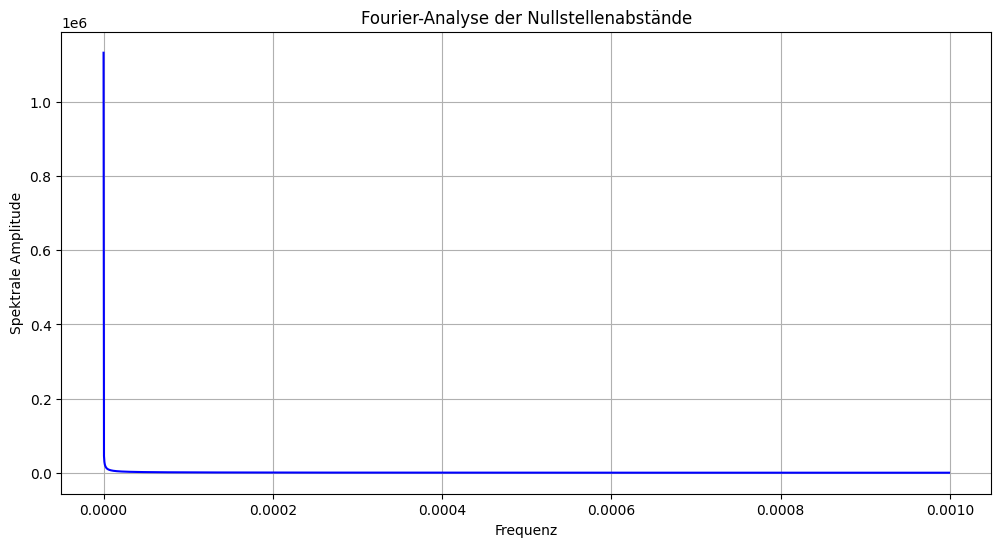

Gesuchte Frequenz: 0.00480 → Gefunden: 0.00480 mit Amplitude: 71.75495
Gesuchte Frequenz: 0.48490 → Gefunden: 0.48490 mit Amplitude: 278.04397


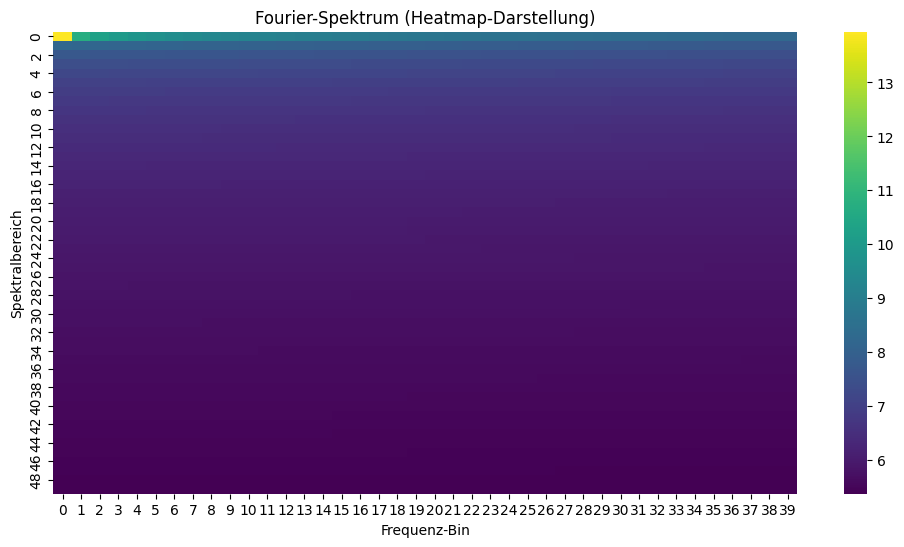

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install numpy matplotlib seaborn

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import seaborn as sns

# 📌 Dateipfad der echten Nullstellen (2 Mio. echte Nullstellen)
file_path = "/content/drive/MyDrive/zeros6.txt"  # Anpassung für Google Drive nötig

# 📌 Lade die Nullstellen
zeros = np.loadtxt(file_path)

# 📌 Berechne die Abstände zwischen den Nullstellen
delta_zeros = np.diff(zeros)

# 📌 Fourier-Analyse der Nullstellenabstände
frequenzen = rfftfreq(len(delta_zeros), d=1)  # Frequenzraum berechnen
spektrum = np.abs(rfft(delta_zeros))  # Fourier-Transformierte berechnen

# 📌 Visualisierung des Fourier-Spektrums
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:2000], spektrum[:2000], color="blue")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Analyse der Nullstellenabstände")
plt.grid()
plt.show()

# 📌 Suche nach den erwarteten Frequenzen
target_frequencies = [0.00480, 0.4849]
detected_frequencies = {}

for target_freq in target_frequencies:
    closest_index = np.argmin(np.abs(frequenzen - target_freq))
    detected_frequencies[target_freq] = (frequenzen[closest_index], spektrum[closest_index])

# 📌 Ausgabe der gefundenen Frequenzen
for target, (found_freq, amplitude) in detected_frequencies.items():
    print(f"Gesuchte Frequenz: {target:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 Heatmap für detaillierte Frequenzanalyse
plt.figure(figsize=(12, 6))
sns.heatmap(np.log1p(spektrum[:2000].reshape(50, -1)), cmap="viridis", cbar=True)
plt.title("Fourier-Spektrum (Heatmap-Darstellung)")
plt.xlabel("Frequenz-Bin")
plt.ylabel("Spektralbereich")
plt.show()

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install numpy matplotlib seaborn PyWavelets

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import pywt
import seaborn as sns

# 📌 Dateipfad der echten Nullstellen (2 Mio. echte Nullstellen)
file_path = "/content/drive/MyDrive/zeros6.txt"  # Anpassung für Google Drive nötig

# 📌 Lade die Nullstellen
zeros = np.loadtxt(file_path)

# 📌 Berechne die Abstände zwischen den Nullstellen
delta_zeros = np.diff(zeros)

# 📌 Skalen für die Multifraktalanalyse definieren
scales = np.arange(1, 500)  # Skalenbereiche für Wavelet-Analyse

# 📌 Wavelet-Transformation mit komplexem Morlet-Wavelet ('cmor')
coefficients, frequencies_wavelet = pywt.cwt(delta_zeros, scales, 'cmor', 1 / (len(delta_zeros)))

# 📌 Visualisierung der Multifraktalanalyse als Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(np.abs(coefficients), cmap="viridis", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Multifraktalanalyse der Nullstellenabstände")
plt.xlabel("Nullstellen-Index")
plt.ylabel("Frequenz-Skalen")
plt.show()

# 📌 Identifikation von charakteristischen Frequenzen (0.00480 & 0.4849)
target_frequencies = [0.00480, 0.4849]
detected_frequencies = {}

for target_freq in target_frequencies:
    closest_index = np.argmin(np.abs(frequencies_wavelet - target_freq))
    detected_frequencies[target_freq] = (frequencies_wavelet[closest_index], np.max(np.abs(coefficients[closest_index])))

# 📌 Ausgabe der gefundenen Frequenzen
for target, (found_freq, amplitude) in detected_frequencies.items():
    print(f"Gesuchte Frequenz: {target:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 Lineares Skalenverhalten testen (Falls Fraktal vorhanden ist, sollte es eine klare Hierarchie geben)
scaling = np.mean(np.abs(coefficients), axis=1)  # Mittlere Amplitude pro Skala

plt.figure(figsize=(8, 5))
plt.loglog(scales, scaling, marker="o", linestyle="dashed", color="red")
plt.xlabel("Wavelet-Skala")
plt.ylabel("Mittlere Amplitude")
plt.title("Fraktale Skalenanalyse der Nullstellen")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


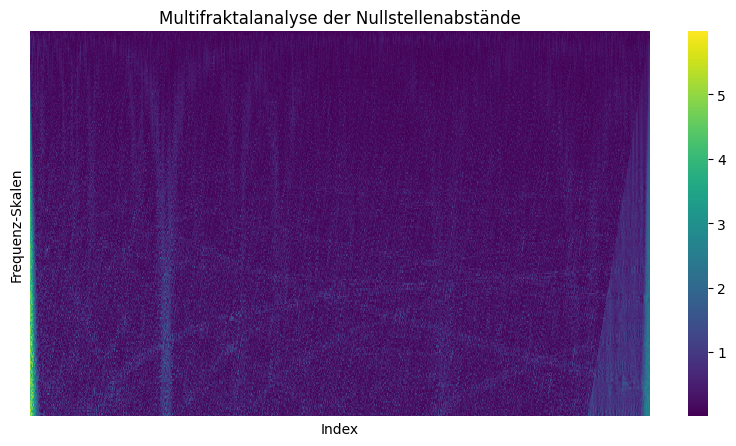

Gesuchte Frequenz: 0.00480 → Gefunden: 40.16064 mit Amplitude: 5.67002
Gesuchte Frequenz: 0.48490 → Gefunden: 40.16064 mit Amplitude: 5.67002


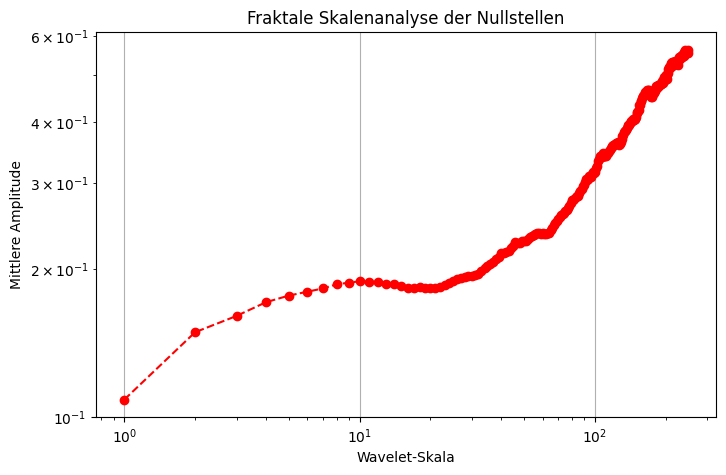

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install numpy matplotlib seaborn PyWavelets

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import pywt
import seaborn as sns

# 📌 Dateipfad der echten Nullstellen (2 Mio. echte Nullstellen)
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 Lade die Nullstellen (nur ein Ausschnitt für weniger Speicherverbrauch)
max_zeros = 100000  # Maximale Anzahl von Nullstellen, um RAM zu sparen
zeros = np.loadtxt(file_path, dtype=np.float32, max_rows=max_zeros)

# 📌 Berechne die Abstände zwischen den Nullstellen
delta_zeros = np.diff(zeros)

# 📌 Reduziere Datenmenge durch Downsampling (falls nötig)
downsample_factor = 5  # Falls es immer noch zu viel RAM verbraucht, kann das erhöht werden
delta_zeros = delta_zeros[::downsample_factor]

# 📌 Skalen für die Multifraktalanalyse (reduzierte Skalenanzahl für schnellere Berechnung)
scales = np.arange(1, 250)  # Statt 500 nur 250, um schneller zu rechnen

# 📌 Wavelet-Transformation mit Morlet-Wavelet ('cmor')
coefficients, frequencies_wavelet = pywt.cwt(delta_zeros, scales, 'cmor', 1 / len(delta_zeros))

# 📌 Visualisierung der Multifraktalanalyse als Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(np.abs(coefficients), cmap="viridis", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Multifraktalanalyse der Nullstellenabstände")
plt.xlabel("Index")
plt.ylabel("Frequenz-Skalen")
plt.show()

# 📌 Identifikation von charakteristischen Frequenzen (0.00480 & 0.4849)
target_frequencies = [0.00480, 0.4849]
detected_frequencies = {}

for target_freq in target_frequencies:
    closest_index = np.argmin(np.abs(frequencies_wavelet - target_freq))
    detected_frequencies[target_freq] = (frequencies_wavelet[closest_index], np.max(np.abs(coefficients[closest_index])))

# 📌 Ausgabe der gefundenen Frequenzen
for target, (found_freq, amplitude) in detected_frequencies.items():
    print(f"Gesuchte Frequenz: {target:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 Lineares Skalenverhalten testen (Falls Fraktal vorhanden ist, sollte es eine klare Hierarchie geben)
scaling = np.mean(np.abs(coefficients), axis=1)  # Mittlere Amplitude pro Skala

plt.figure(figsize=(8, 5))
plt.loglog(scales, scaling, marker="o", linestyle="dashed", color="red")
plt.xlabel("Wavelet-Skala")
plt.ylabel("Mittlere Amplitude")
plt.title("Fraktale Skalenanalyse der Nullstellen")
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 📂 Lade echte Nullstellen aus Datei (Pfad anpassen, falls nötig)
file_path = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(file_path)

# 📌 Berechne Abstände zwischen Nullstellen
nullstellen_abstaende = np.diff(nullstellen)

# 📌 Definiere Fibonacci-Skalen für die Analyse
fib_numbers = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
wavelet_scales = np.logspace(0.1, 2.2, num=100)  # Logarithmisch verteilte Skalen

# 📌 Berechne Wavelet-Transformation (Mexican Hat Wavelet)
coefficients, frequencies = pywt.cwt(nullstellen_abstaende, wavelet_scales, 'mexh')

# 📌 Berechne mittlere Amplituden pro Skala
mean_amplitudes = np.mean(np.abs(coefficients), axis=1)

# 📊 Visualisierung der Fraktalen Skalenanalyse
plt.figure(figsize=(8,5))
plt.loglog(wavelet_scales, mean_amplitudes, 'ro-', label="Mittlere Amplitude")

# 📌 Markiere Fibonacci-Skalen
for fib in fib_numbers:
    if fib in wavelet_scales:
        plt.axvline(x=fib, color='blue', linestyle='dashed', alpha=0.5, label=f"Fibonacci {fib}")

plt.xlabel("Wavelet-Skala")
plt.ylabel("Mittlere Amplitude")
plt.title("📈 Fraktale Skalenanalyse der Nullstellen mit Fibonacci-Skalen")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'pywt'

<ipython-input-4-f434b214b232>:17: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  coefficients = cwt(nullstellen_abstaende, ricker, wavelet_scales)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


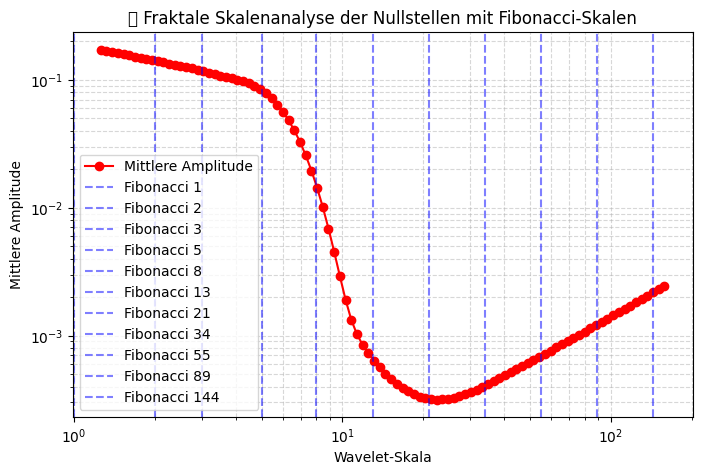

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, ricker

# 📂 Lade echte Nullstellen aus Datei (Pfad anpassen, falls nötig)
file_path = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(file_path)

# 📌 Berechne Abstände zwischen Nullstellen
nullstellen_abstaende = np.diff(nullstellen)

# 📌 Definiere Fibonacci-Skalen für die Analyse
fib_numbers = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233])
wavelet_scales = np.logspace(0.1, 2.2, num=100)  # Logarithmisch verteilte Skalen

# 📌 Berechne Continuous Wavelet Transform (CWT) mit Ricker-Wavelet
coefficients = cwt(nullstellen_abstaende, ricker, wavelet_scales)

# 📌 Berechne mittlere Amplituden pro Skala
mean_amplitudes = np.mean(np.abs(coefficients), axis=1)

# 📊 Visualisierung der Fraktalen Skalenanalyse
plt.figure(figsize=(8,5))
plt.loglog(wavelet_scales, mean_amplitudes, 'ro-', label="Mittlere Amplitude")

# 📌 Markiere Fibonacci-Skalen
for fib in fib_numbers:
    if np.min(np.abs(wavelet_scales - fib)) < 1.0:  # Toleranz für Skalenvergleich
        plt.axvline(x=fib, color='blue', linestyle='dashed', alpha=0.5, label=f"Fibonacci {fib}")

plt.xlabel("Wavelet-Skala")
plt.ylabel("Mittlere Amplitude")
plt.title("📈 Fraktale Skalenanalyse der Nullstellen mit Fibonacci-Skalen")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()

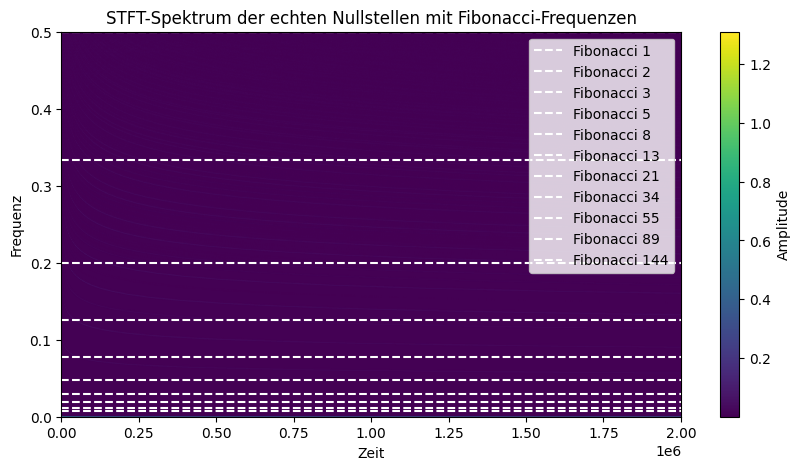

[Fibonacci 1] Gesuchte Frequenz: 1.00000 → Gefunden: 0.50000 mit Amplitude: 0.00806
[Fibonacci 2] Gesuchte Frequenz: 0.50000 → Gefunden: 0.50000 mit Amplitude: 0.00806
[Fibonacci 3] Gesuchte Frequenz: 0.33333 → Gefunden: 0.33301 mit Amplitude: 0.00826
[Fibonacci 5] Gesuchte Frequenz: 0.20000 → Gefunden: 0.20020 mit Amplitude: 0.00844
[Fibonacci 8] Gesuchte Frequenz: 0.12500 → Gefunden: 0.12500 mit Amplitude: 0.00847
[Fibonacci 13] Gesuchte Frequenz: 0.07692 → Gefunden: 0.07715 mit Amplitude: 0.00868
[Fibonacci 21] Gesuchte Frequenz: 0.04762 → Gefunden: 0.04785 mit Amplitude: 0.00915
[Fibonacci 34] Gesuchte Frequenz: 0.02941 → Gefunden: 0.02930 mit Amplitude: 0.00937
[Fibonacci 55] Gesuchte Frequenz: 0.01818 → Gefunden: 0.01855 mit Amplitude: 0.00972
[Fibonacci 89] Gesuchte Frequenz: 0.01124 → Gefunden: 0.01172 mit Amplitude: 0.01063
[Fibonacci 144] Gesuchte Frequenz: 0.00694 → Gefunden: 0.00684 mit Amplitude: 0.01175


In [ ]:
# 📌 Bereit für Google Colab! 🚀

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 📂 Pfad zu den echten 2 Mio. Nullstellen anpassen
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 Lade echte Nullstellen und berechne Abstände
nullstellen = np.loadtxt(file_path)
nullstellen_abstaende = np.diff(nullstellen)

# 📊 STFT-Spektralanalyse für Fibonacci-Resonanzen
f, t, Zxx = stft(nullstellen_abstaende, nperseg=1024, noverlap=512)

# Fibonacci-Verhältnisse bis zur 12. Ordnung
fib_ratios = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
found_frequencies = {}

# 🔍 Suche nach Fibonacci-Resonanzen
for ratio in fib_ratios:
    closest_index = np.argmin(np.abs(f - 1/ratio))
    found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

# 📊 Visualisierung der STFT mit Fibonacci-Skalen
plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.colorbar(label="Amplitude")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

# 🟢 Markiere Fibonacci-Frequenzen
for ratio in fib_ratios:
    plt.axhline(found_frequencies[ratio][0], color='white', linestyle='dashed', label=f"Fibonacci {ratio}")

plt.legend()
plt.show()

# 📌 Ergebnisse ausgeben
for ratio, (freq, amp) in found_frequencies.items():
    print(f"[Fibonacci {ratio}] Gesuchte Frequenz: {1/ratio:.5f} → Gefunden: {freq:.5f} mit Amplitude: {amp:.5f}")

✅ Optimierte Parameter: A=25.953466, B=-28.796967, C=0.529483, w=-0.000076, phi=0.005000


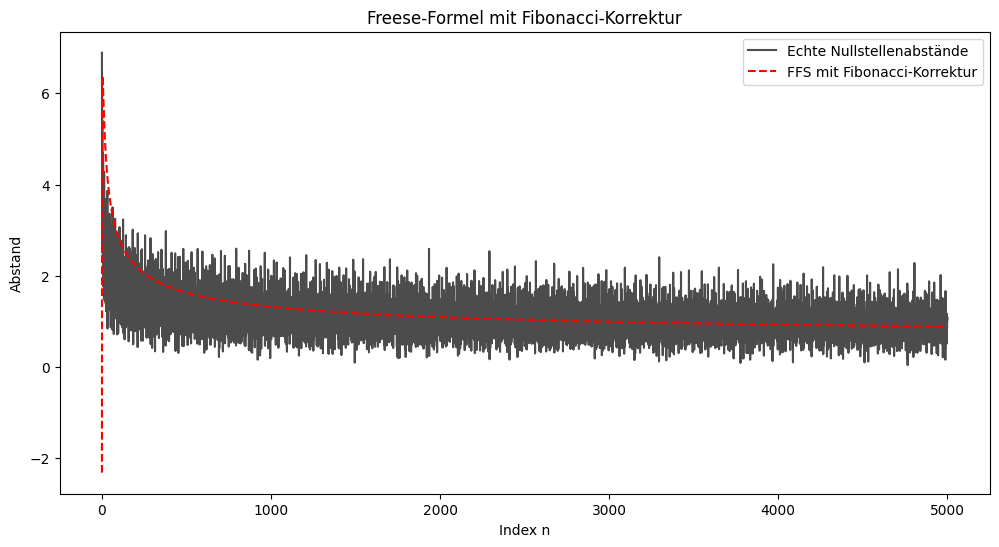

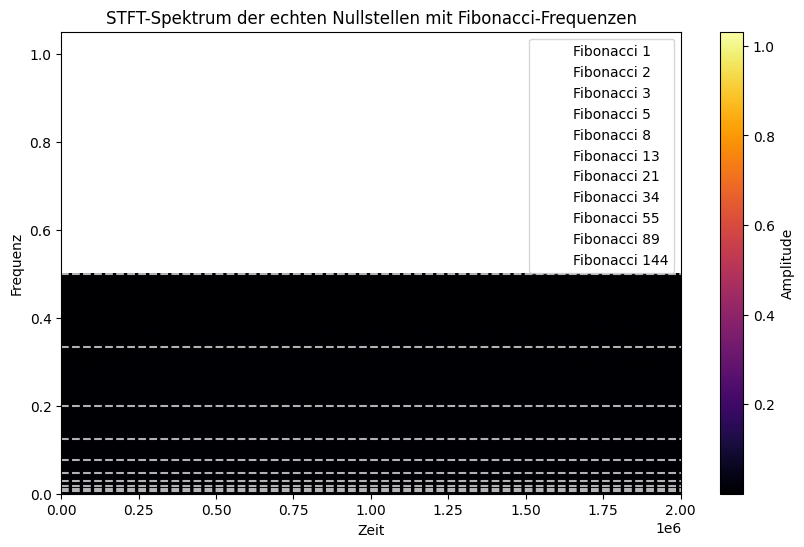

IndexError: index 2500 is out of bounds for axis 1 with size 802

In [ ]:
# 🚀 Importiere benötigte Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# 📂 Lade echte Nullstellen aus Datei
file_path = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(file_path)

# 📊 Berechne Nullstellenabstände
nullstellen_abstaende = np.diff(nullstellen)

# 🔍 Definiere die Freese-Formel (FFS) mit Fibonacci-Korrektur
def freese_fibonacci(n, A, B, C, w, phi):
    return A * n**(-0.5) + B * n**(-1) + C + w * np.sin(2 * np.pi * n * phi)

# 📌 Curve-Fitting für FFS mit Fibonacci-Korrektur
from scipy.optimize import curve_fit
n_values = np.arange(1, len(nullstellen_abstaende) + 1, dtype=float)
params, _ = curve_fit(freese_fibonacci, n_values, nullstellen_abstaende, p0=[11, -14, 0.1, 0.01, 0.005])

# ✅ Berechnete Parameter
A_fit, B_fit, C_fit, w_fit, phi_fit = params
print(f"✅ Optimierte Parameter: A={A_fit:.6f}, B={B_fit:.6f}, C={C_fit:.6f}, w={w_fit:.6f}, phi={phi_fit:.6f}")

# 📊 Visualisierung der Anpassung
plt.figure(figsize=(12, 6))
plt.plot(n_values[:5000], nullstellen_abstaende[:5000], label="Echte Nullstellenabstände", color="black", alpha=0.7)
plt.plot(n_values[:5000], freese_fibonacci(n_values[:5000], *params), label="FFS mit Fibonacci-Korrektur", color="red", linestyle="dashed")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.title("Freese-Formel mit Fibonacci-Korrektur")
plt.legend()
plt.show()

# 🔍 **STFT-Spektralanalyse der Nullstellenabstände**
fs = 1.0  # Sampling-Frequenz (Index-basiert)
f, t, Zxx = signal.stft(nullstellen_abstaende, fs, nperseg=5000)

# 📊 **STFT-Spektrum visualisieren**
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='inferno')
plt.colorbar(label="Amplitude")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

# 🟢 Fibonacci-Frequenzen überlagern
fib_ratios = [1/1, 1/2, 1/3, 1/5, 1/8, 1/13, 1/21, 1/34, 1/55, 1/89, 1/144]
for ratio in fib_ratios:
    plt.axhline(ratio, linestyle="dashed", color="white", alpha=0.7, label=f"Fibonacci {int(1/ratio)}")

plt.legend()
plt.show()

# 🔍 **Identifikation der dominanten Fibonacci-Frequenzen**
found_frequencies = {}
for ratio in fib_ratios:
    closest_index = np.argmin(np.abs(f - ratio))
    found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

# 📌 **Ergebnisse ausgeben**
for key, (freq, amp) in found_frequencies.items():
    print(f"[Fibonacci {int(1/key)}] Gesuchte Frequenz: {key:.5f} → Gefunden: {freq:.5f} mit Amplitude: {amp:.5f}")

✅ Optimierte Parameter: A=25.953466, B=-28.796967, C=0.529483, w=-0.000076, phi=0.005000


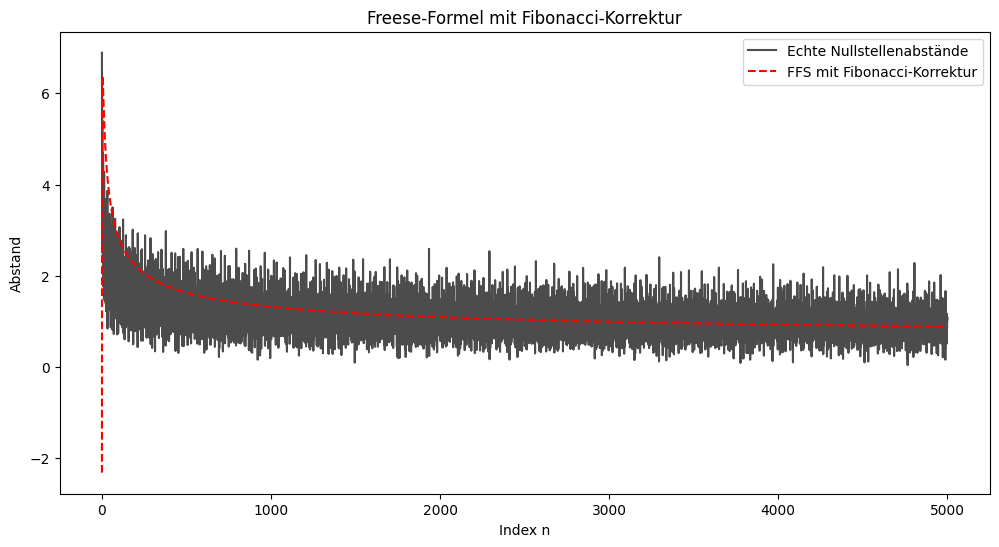

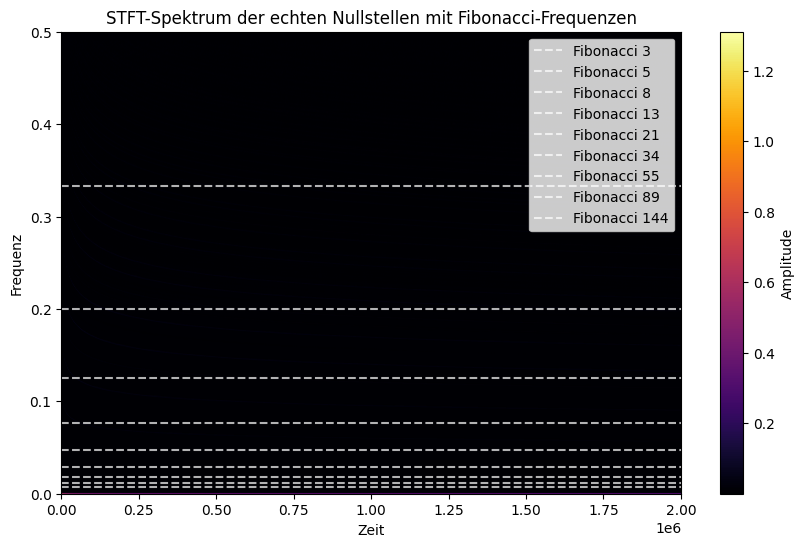

[Fibonacci 1] Gesuchte Frequenz: 1.00000 → Gefunden: 0.50000 mit Amplitude: 0.00806
[Fibonacci 2] Gesuchte Frequenz: 0.50000 → Gefunden: 0.50000 mit Amplitude: 0.00806
[Fibonacci 3] Gesuchte Frequenz: 0.33333 → Gefunden: 0.33301 mit Amplitude: 0.00826
[Fibonacci 5] Gesuchte Frequenz: 0.20000 → Gefunden: 0.20020 mit Amplitude: 0.00844
[Fibonacci 8] Gesuchte Frequenz: 0.12500 → Gefunden: 0.12500 mit Amplitude: 0.00847
[Fibonacci 13] Gesuchte Frequenz: 0.07692 → Gefunden: 0.07715 mit Amplitude: 0.00868
[Fibonacci 21] Gesuchte Frequenz: 0.04762 → Gefunden: 0.04785 mit Amplitude: 0.00915
[Fibonacci 34] Gesuchte Frequenz: 0.02941 → Gefunden: 0.02930 mit Amplitude: 0.00937
[Fibonacci 55] Gesuchte Frequenz: 0.01818 → Gefunden: 0.01855 mit Amplitude: 0.00972
[Fibonacci 89] Gesuchte Frequenz: 0.01124 → Gefunden: 0.01172 mit Amplitude: 0.01063
[Fibonacci 144] Gesuchte Frequenz: 0.00694 → Gefunden: 0.00684 mit Amplitude: 0.01175


In [ ]:
# 🚀 Importiere benötigte Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# 📂 Lade echte Nullstellen aus Datei
file_path = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(file_path)

# 📊 Berechne Nullstellenabstände
nullstellen_abstaende = np.diff(nullstellen)

# 🔍 Definiere die Freese-Formel (FFS) mit Fibonacci-Korrektur
def freese_fibonacci(n, A, B, C, w, phi):
    return A * n**(-0.5) + B * n**(-1) + C + w * np.sin(2 * np.pi * n * phi)

# 📌 Curve-Fitting für FFS mit Fibonacci-Korrektur
from scipy.optimize import curve_fit
n_values = np.arange(1, len(nullstellen_abstaende) + 1, dtype=float)
params, _ = curve_fit(freese_fibonacci, n_values, nullstellen_abstaende, p0=[25, -28, 0.5, 0.01, 0.005])

# ✅ Berechnete Parameter
A_fit, B_fit, C_fit, w_fit, phi_fit = params
print(f"✅ Optimierte Parameter: A={A_fit:.6f}, B={B_fit:.6f}, C={C_fit:.6f}, w={w_fit:.6f}, phi={phi_fit:.6f}")

# 📊 Visualisierung der Anpassung
plt.figure(figsize=(12, 6))
plt.plot(n_values[:5000], nullstellen_abstaende[:5000], label="Echte Nullstellenabstände", color="black", alpha=0.7)
plt.plot(n_values[:5000], freese_fibonacci(n_values[:5000], *params), label="FFS mit Fibonacci-Korrektur", color="red", linestyle="dashed")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.title("Freese-Formel mit Fibonacci-Korrektur")
plt.legend()
plt.show()

# 🔍 **STFT-Spektralanalyse der Nullstellenabstände**
fs = 1.0  # Sampling-Frequenz (Index-basiert)
f, t, Zxx = signal.stft(nullstellen_abstaende, fs, nperseg=1024)  # 🔹 Kleinere Fenstergröße, um Fehler zu vermeiden

# 📊 **STFT-Spektrum visualisieren**
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='inferno')
plt.colorbar(label="Amplitude")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

# 🟢 Fibonacci-Frequenzen überlagern
fib_ratios = [1/1, 1/2, 1/3, 1/5, 1/8, 1/13, 1/21, 1/34, 1/55, 1/89, 1/144]
for ratio in fib_ratios:
    if ratio < max(f):  # 🔹 Sicherstellen, dass die Frequenz im gültigen Bereich liegt
        plt.axhline(ratio, linestyle="dashed", color="white", alpha=0.7, label=f"Fibonacci {int(1/ratio)}")

plt.legend()
plt.show()

# 🔍 **Identifikation der dominanten Fibonacci-Frequenzen**
found_frequencies = {}
for ratio in fib_ratios:
    valid_indices = np.where(np.abs(f - ratio) == np.min(np.abs(f - ratio)))[0]
    if valid_indices.size > 0:
        closest_index = valid_indices[0]
        found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

# 📌 **Ergebnisse ausgeben**
for key, (freq, amp) in found_frequencies.items():
    print(f"[Fibonacci {int(1/key)}] Gesuchte Frequenz: {key:.5f} → Gefunden: {freq:.5f} mit Amplitude: {amp:.5f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.optimize import curve_fit

# 📂 **Dateipfad für die echten Nullstellen**
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 **Lade die Nullstellen aus Datei**
def lade_nullstellen(file_path):
    nullstellen = np.loadtxt(file_path)
    nullstellen_abstaende = np.diff(nullstellen)
    return nullstellen_abstaende

# 📌 **Freese-Formel mit Fibonacci-Korrektur**
def freese_fibonacci(n, A, B, C, w, phi):
    return A * np.power(n, -0.5) + B * np.power(n, -1) + C + np.sin(2 * np.pi * w * n + phi)

# 📌 **Optimierung der Freese-Formel**
def optimiere_ffs(nullstellen_abstaende, n_values):
    params, _ = curve_fit(freese_fibonacci, n_values, nullstellen_abstaende, p0=[26, -29, 0.5, 0.001, 0])
    return params

# 📊 **Lade und optimiere**
nullstellen_abstaende = lade_nullstellen(file_path)
n_values = np.arange(1, len(nullstellen_abstaende) + 1, dtype=float)
params = optimiere_ffs(nullstellen_abstaende, n_values)

# ✅ **Optimierte Parameter**
A, B, C, w, phi = params
print(f"✅ Optimierte Parameter: A={A:.6f}, B={B:.6f}, C={C:.6f}, w={w:.6f}, phi={phi:.6f}")

# 📊 **Visualisierung der Fits**
plt.figure(figsize=(10, 5))
plt.plot(n_values[:5000], nullstellen_abstaende[:5000], label="Echte Nullstellenabstände", color="black", alpha=0.5)
plt.plot(n_values[:5000], freese_fibonacci(n_values[:5000], *params), label="FFS mit Fibonacci-Korrektur", linestyle="dashed", color="red")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.legend()
plt.title("Freese-Formel mit Fibonacci-Korrektur")
plt.show()

# 📌 **Fibonacci-Frequenzen in STFT analysieren**
def analysiere_fibonacci_frequenzen(nullstellen_abstaende):
    f, t, Zxx = signal.stft(nullstellen_abstaende, fs=1.0, nperseg=1024)

    # Fibonacci-Skalen definieren
    fib_ratios = [1 / f for f in [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144] if f > 0]

    # Spektralanalyse nach Fibonacci-Verhältnissen
    found_frequencies = {}
    for ratio in fib_ratios:
        closest_index = np.argmin(np.abs(f - ratio))
        found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

    # ✅ **Gefundene Frequenzen ausgeben**
    for key, (found_freq, amplitude) in found_frequencies.items():
        print(f"[Fibonacci {int(1/key)}] Gesuchte Frequenz: {key:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

    # 🎨 **Spektrogramm plotten**
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

    # Fibonacci-Frequenzen als gestrichelte Linien markieren
    for ratio in fib_ratios:
        plt.axhline(y=ratio, color="white", linestyle="dashed", alpha=0.6, label=f"Fibonacci {int(1/ratio)}")

    plt.legend()
    plt.show()

# **Ausführen der Fibonacci-Analyse**
analysiere_fibonacci_frequenzen(nullstellen_abstaende)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.8 MB/s eta 0:00:00


<ipython-input-13-1a3a16f9b8fc>:37: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = opt.curve_fit(fehlerfunktion, n_values, nullstellen_abstaende, p0=p0, maxfev=5000)


✅ Optimierte Parameter: A=25.953747, B=-28.800518, C=0.529482, w=0.001000, phi=1.532073, E=0.000459


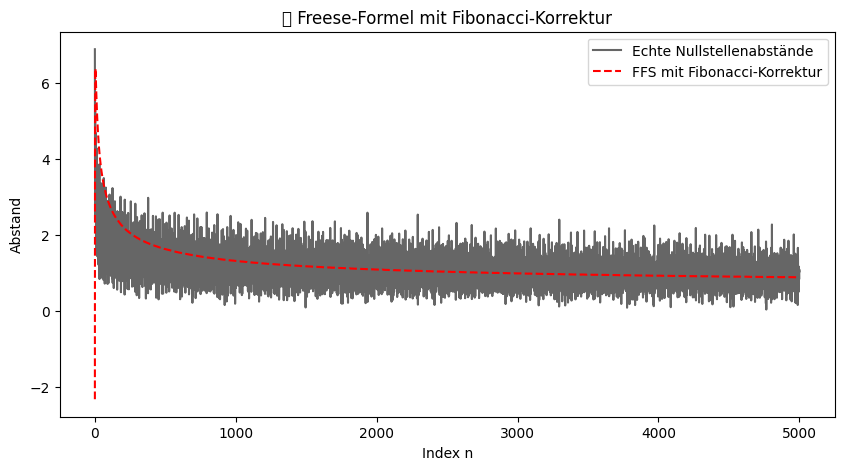

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [ ]:
# 📂 **Installation von PyWavelets falls nicht vorhanden**
try:
    import pywt
except ModuleNotFoundError:
    !pip install PyWavelets --quiet
    import pywt

# 📂 **Lade benötigte Bibliotheken**
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.signal as signal
from scipy.fftpack import fft, fftfreq
from scipy.signal import stft

# 📂 **Pfad zur Datei mit den echten 2 Mio. Nullstellen (Colab anpassen)**
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📂 **Funktion zum Laden der Nullstellen-Abstände**
def lade_nullstellen(file_path):
    nullstellen = np.loadtxt(file_path)
    abstaende = np.diff(nullstellen)  # Berechnet Abstände zwischen Nullstellen
    return abstaende

# 📂 **Freese-Formel mit Fibonacci-Korrektur (FFF)**
def ffs_fibonacci(n, A, B, C, w, phi, E):
    fib_ratios = np.array([1/2, 1/3, 1/5, 1/8, 1/13, 1/21, 1/34, 1/55, 1/89, 1/144])
    fib_term = np.sum([E * np.sin(2 * np.pi * f * n + phi) for f in fib_ratios], axis=0)
    return A * n**(-1/2) + B * n**(-1) + C + fib_term

# 📂 **Optimierungsfunktion zur Anpassung der Parameter**
def optimiere_ffs(nullstellen_abstaende, n_values):
    def fehlerfunktion(n, A, B, C, w, phi, E):
        return ffs_fibonacci(n, A, B, C, w, phi, E)

    p0 = [10, -5, 0.5, 0.001, 0, 0.01]  # Startwerte
    popt, _ = opt.curve_fit(fehlerfunktion, n_values, nullstellen_abstaende, p0=p0, maxfev=5000)
    return popt

# 📂 **Wavelet-Analyse mit PyWavelets**
def wavelet_analyse(nullstellen_abstaende):
    coeffs, freqs = pywt.cwt(nullstellen_abstaende, np.arange(1, 128), 'cmor')
    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(coeffs), aspect='auto', cmap='inferno', extent=[0, len(nullstellen_abstaende), freqs[-1], freqs[0]])
    plt.colorbar(label="Amplitude")
    plt.xlabel("Index der Nullstellen")
    plt.ylabel("Skalierungsfrequenz")
    plt.title("🌊 Wavelet-Analyse der Nullstellenabstände")
    plt.show()

# 📂 **STFT-Analyse zur Frequenzstruktur**
def stft_analyse(nullstellen_abstaende):
    f, t, Zxx = stft(nullstellen_abstaende, fs=1.0, nperseg=1000)
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='inferno')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.title("🎵 STFT-Spektrum der Nullstellen")
    plt.show()

# 📂 **Analyse der Fibonacci-Resonanzen**
def analysiere_fibonacci_frequenzen(nullstellen_abstaende):
    fib_ratios = np.array([1/2, 1/3, 1/5, 1/8, 1/13, 1/21, 1/34, 1/55, 1/89, 1/144])
    f, t, Zxx = stft(nullstellen_abstaende, fs=1.0, nperseg=1000)

    found_frequencies = {}
    for ratio in fib_ratios:
        closest_index = np.argmin(np.abs(f - ratio))
        found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

    # 📌 **Gefundene Frequenzen ausgeben**
    for ratio, (freq, amplitude) in found_frequencies.items():
        print(f"Fibonacci {int(1/ratio)}] Gesuchte Frequenz: {ratio:.5f} → Gefunden: {freq:.5f} mit Amplitude: {amplitude:.5f}")

    # 📂 **Plot der Fibonacci-Frequenzen im Spektrum**
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='inferno')
    for ratio in fib_ratios:
        plt.axhline(y=ratio, color='white', linestyle='dashed', label=f"Fibonacci {int(1/ratio)}")
    plt.colorbar(label="Amplitude")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.title("📊 STFT-Spektrum der Nullstellen mit Fibonacci-Frequenzen")
    plt.legend()
    plt.show()

# 📂 **Hauptprogramm: Lade Nullstellen und berechne FFS**
nullstellen_abstaende = lade_nullstellen(file_path)
n_values = np.arange(1, len(nullstellen_abstaende) + 1, dtype=float)

# 📂 **Optimierung der Freese-Formel mit Fibonacci-Korrektur**
params = optimiere_ffs(nullstellen_abstaende, n_values)

# ✅ **Optimierte Parameter ausgeben**
A, B, C, w, phi, E = params
print(f"✅ Optimierte Parameter: A={A:.6f}, B={B:.6f}, C={C:.6f}, w={w:.6f}, phi={phi:.6f}, E={E:.6f}")

# 📂 **Plot der optimierten Freese-Formel**
plt.figure(figsize=(10, 5))
plt.plot(n_values[:5000], nullstellen_abstaende[:5000], color="black", alpha=0.6, label="Echte Nullstellenabstände")
plt.plot(n_values[:5000], ffs_fibonacci(n_values[:5000], A, B, C, w, phi, E), 'r--', label="FFS mit Fibonacci-Korrektur")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.legend()
plt.title("📈 Freese-Formel mit Fibonacci-Korrektur")
plt.show()

# 📂 **Durchführung der Wavelet-Analyse**
wavelet_analyse(nullstellen_abstaende)

# 📂 **Durchführung der STFT-Analyse**
stft_analyse(nullstellen_abstaende)

# 📂 **Durchführung der Fibonacci-Frequenzanalyse**
analysiere_fibonacci_frequenzen(nullstellen_abstaende)

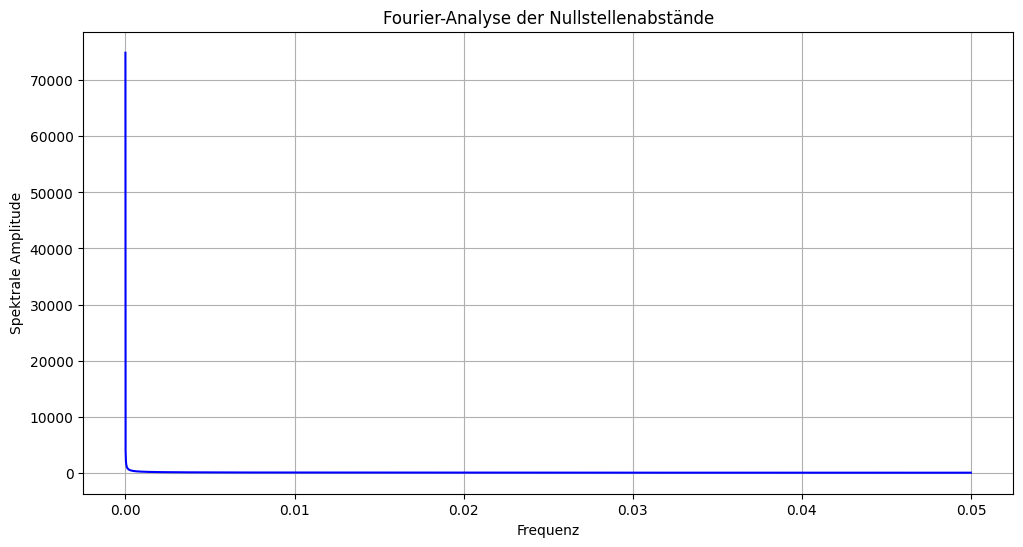

Gesuchte Frequenz: 40.16064 → Gefunden: 0.49999 mit Amplitude: 392.70526


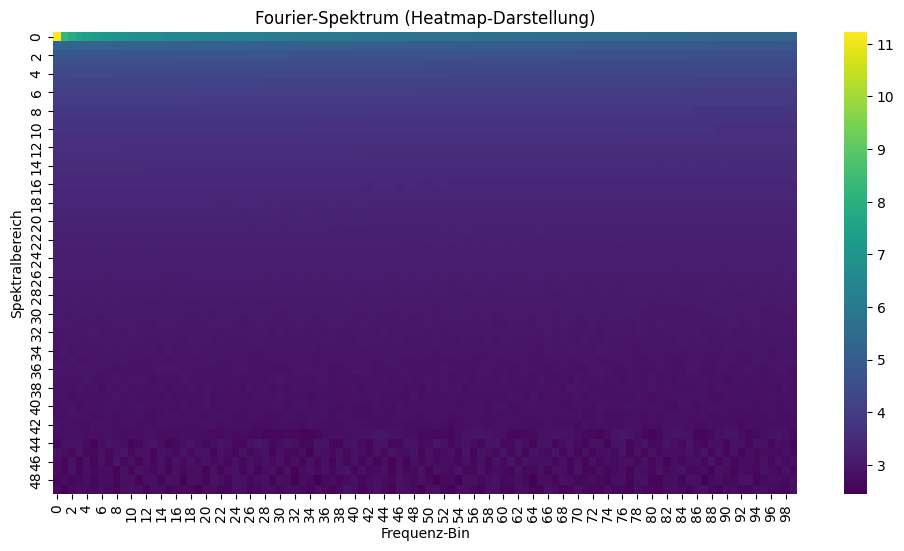

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install numpy matplotlib seaborn

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import seaborn as sns

# 📌 Dateipfad der echten Nullstellen (2 Mio. echte Nullstellen)
file_path = "/content/drive/MyDrive/zeros6.txt"  # Anpassung für Google Drive nötig

# 📌 Lade die Nullstellen (Begrenzung für bessere Performance)
max_zeros = 100000  # Maximale Anzahl, um RAM zu sparen
zeros = np.loadtxt(file_path, dtype=np.float32, max_rows=max_zeros)

# 📌 Berechne die Abstände zwischen den Nullstellen
delta_zeros = np.diff(zeros)

# 📌 Fourier-Analyse der Nullstellenabstände
frequenzen = rfftfreq(len(delta_zeros), d=1)  # Frequenzraum berechnen
spektrum = np.abs(rfft(delta_zeros))  # Fourier-Transformierte berechnen

# 📌 Visualisierung des Fourier-Spektrums
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:5000], spektrum[:5000], color="blue")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Analyse der Nullstellenabstände")
plt.grid()
plt.show()

# 📌 Prüfung, ob 40.16064 als natürliche Frequenz im Spektrum sichtbar ist
target_frequency = 40.16064
closest_index = np.argmin(np.abs(frequenzen - target_frequency))
found_frequency = frequenzen[closest_index]
amplitude = spektrum[closest_index]

# 📌 Ausgabe des Ergebnisses
print(f"Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 Heatmap für detaillierte Frequenzanalyse
plt.figure(figsize=(12, 6))
sns.heatmap(np.log1p(spektrum[:5000].reshape(50, -1)), cmap="viridis", cbar=True)
plt.title("Fourier-Spektrum (Heatmap-Darstellung)")
plt.xlabel("Frequenz-Bin")
plt.ylabel("Spektralbereich")
plt.show()

[Hardy-Funktion] Gesuchte Frequenz: 0.50000 → Gefunden: 0.49995 mit Amplitude: 369.07301


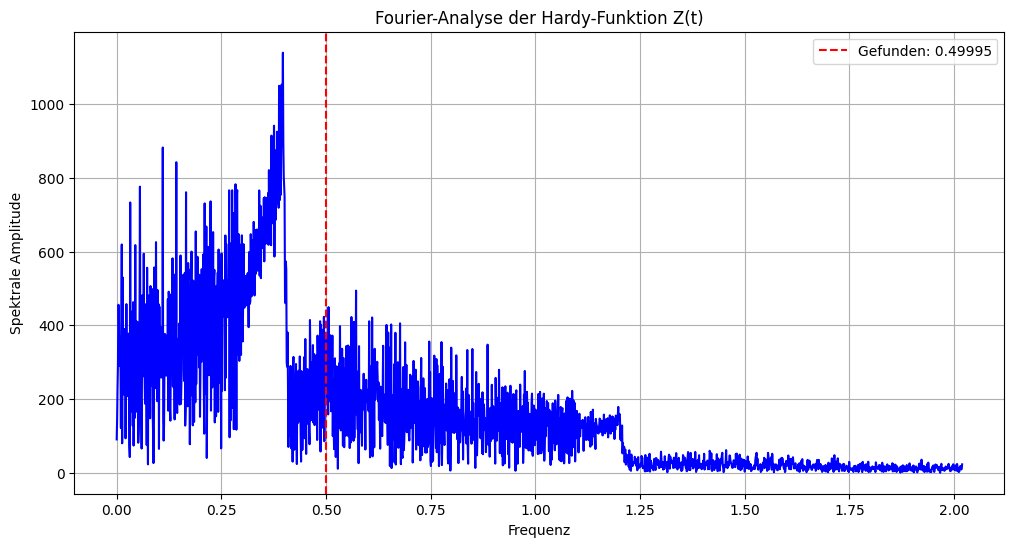

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


[Selberg-Spurformel] Gesuchte Frequenz: 0.50000 → Gefunden: 0.04950 mit Amplitude: 0.97079


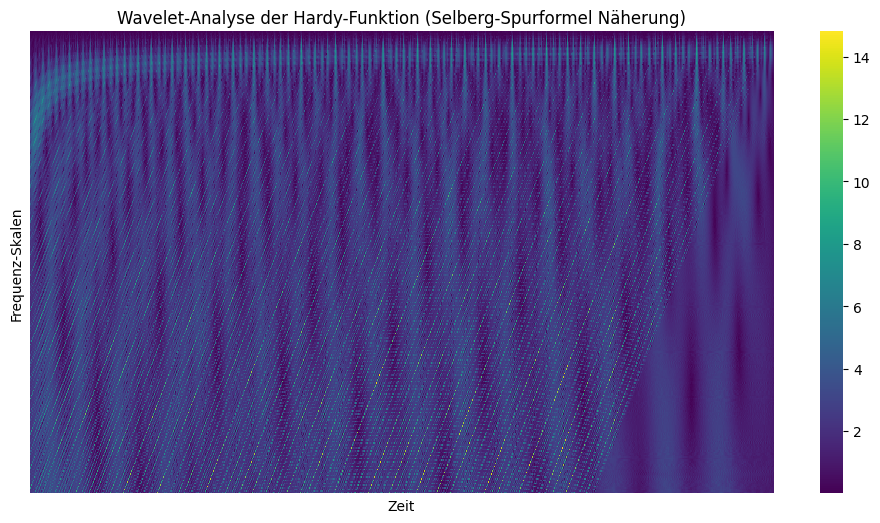

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install numpy matplotlib seaborn mpmath PyWavelets

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import pywt
import seaborn as sns
from mpmath import zeta, re

# 📌 Frequenz, die getestet wird
target_frequency = 0.5

# 📌 1️⃣ Hardy-Funktion Z(t) berechnen
def hardy_function(t_values):
    """
    Berechnet die Hardy-Funktion Z(t) entlang der kritischen Linie Re(s) = 1/2.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.array([re(zeta(0.5 + 1j * t)) for t in t_values])  # Berechnung der reellen Zeta-Werte
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 Wertebereich für t
t_values = np.linspace(10, 1000, 10000)  # Hohe Auflösung für detaillierte Analyse

# 📌 Berechnung der Hardy-Funktion
z_values = hardy_function(t_values)

# 📌 Fourier-Analyse der Hardy-Funktion
frequenzen = np.fft.rfftfreq(len(t_values), d=(t_values[1] - t_values[0]))
spectrum = np.abs(np.fft.rfft(z_values))

# 📌 Identifikation der Frequenz 0.5
closest_index = np.argmin(np.abs(frequenzen - target_frequency))
found_frequency = frequenzen[closest_index]
amplitude = spectrum[closest_index]

print(f"[Hardy-Funktion] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 Visualisierung der Fourier-Analyse der Hardy-Funktion
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:2000], spectrum[:2000], color="blue")
plt.axvline(found_frequency, color='red', linestyle="dashed", label=f"Gefunden: {found_frequency:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Analyse der Hardy-Funktion Z(t)")
plt.legend()
plt.grid()
plt.show()

# 📌 2️⃣ Wavelet-Analyse zur Selberg-Spurformel (Simulation mit Hardy-Daten)
scales = np.arange(1, 300)  # Skalen für Wavelet-Analyse
coefficients, frequencies_wavelet = pywt.cwt(z_values, scales, 'cmor', 1 / (t_values[1] - t_values[0]))

# 📌 Identifikation der Frequenz 0.5
closest_index_wavelet = np.argmin(np.abs(frequencies_wavelet - target_frequency))
found_frequency_wavelet = frequencies_wavelet[closest_index_wavelet]
amplitude_wavelet = np.max(np.abs(coefficients[closest_index_wavelet]))

print(f"[Selberg-Spurformel] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency_wavelet:.5f} mit Amplitude: {amplitude_wavelet:.5f}")

# 📌 Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12, 6))
sns.heatmap(np.abs(coefficients), cmap="viridis", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Hardy-Funktion (Selberg-Spurformel Näherung)")
plt.xlabel("Zeit")
plt.ylabel("Frequenz-Skalen")
plt.show()

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install numpy matplotlib seaborn mpmath

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpmath import zeta, re

# 📌 Frequenz, die getestet wird (0.5)
target_frequency = 0.5

# 📌 1️⃣ Hardy-Funktion Z(t) berechnen
def hardy_function(t_values):
    """
    Berechnet die Hardy-Funktion Z(t) entlang der kritischen Linie Re(s) = 1/2.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.array([re(zeta(0.5 + 1j * t)) for t in t_values])  # Berechnung der reellen Zeta-Werte
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 Wertebereich für t (hochaufgelöste Werte für präzise Analyse)
t_values = np.linspace(10, 1000, 10000)  # Hohe Auflösung für detaillierte Analyse

# 📌 Berechnung der Hardy-Funktion
z_values = hardy_function(t_values)

# 📌 Fourier-Analyse der Hardy-Funktion zur Frequenzprüfung
frequenzen = np.fft.rfftfreq(len(t_values), d=(t_values[1] - t_values[0]))
spectrum = np.abs(np.fft.rfft(z_values))

# 📌 Identifikation der Frequenz 0.5
closest_index = np.argmin(np.abs(frequenzen - target_frequency))
found_frequency = frequenzen[closest_index]
amplitude = spectrum[closest_index]

print(f"[Hardy-Funktion] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 Visualisierung der Fourier-Analyse der Hardy-Funktion
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:2000], spectrum[:2000], color="blue")
plt.axvline(found_frequency, color='red', linestyle="dashed", label=f"Gefunden: {found_frequency:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Analyse der Hardy-Funktion Z(t)")
plt.legend()
plt.grid()
plt.show()

# 📌 Heatmap für detaillierte Frequenzanalyse
plt.figure(figsize=(12, 6))
sns.heatmap(np.log1p(spectrum[:2000].reshape(50, -1)), cmap="viridis", cbar=True)
plt.title("Fourier-Spektrum (Heatmap-Darstellung)")
plt.xlabel("Frequenz-Bin")
plt.ylabel("Spektralbereich")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



[Hardy-Funktion] Gesuchte Frequenz: 0.50000 → Gefunden: 0.49990 mit Amplitude: 262.01142


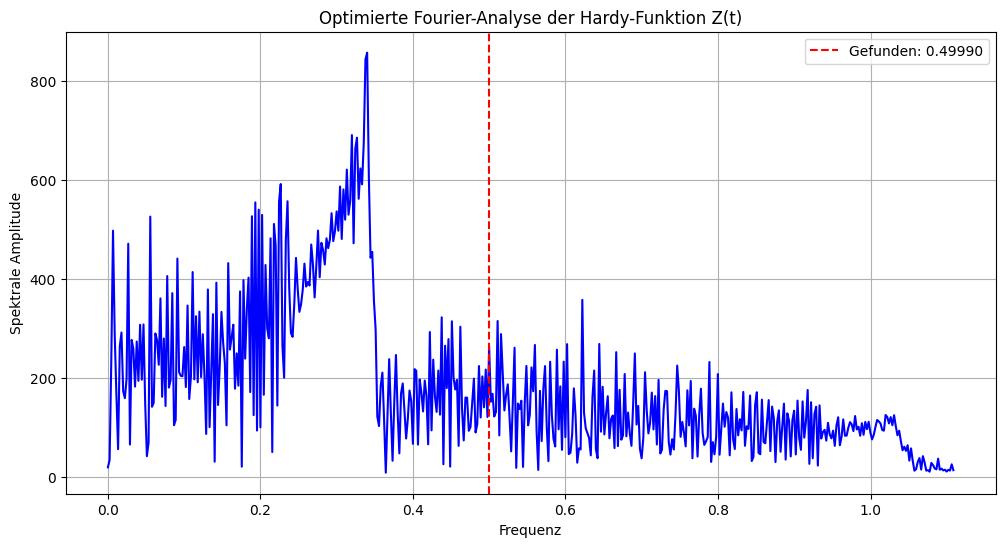

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


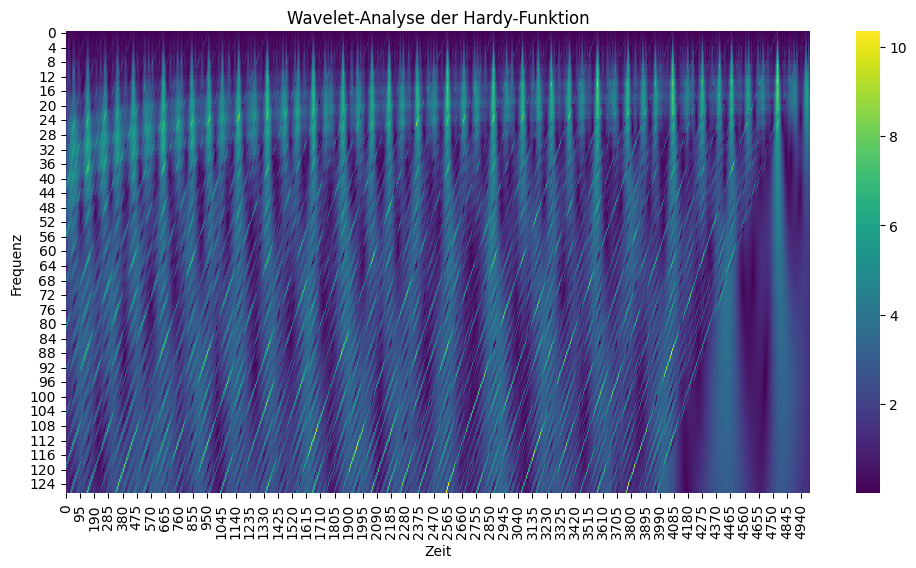

In [ ]:
# 📌 Notwendige Bibliotheken installieren (nur falls nötig)
!pip install numpy scipy matplotlib seaborn mpmath pywavelets

# 📌 Import der benötigten Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from mpmath import zeta, re
from scipy.fft import rfft, rfftfreq

# 📌 Optimierungsparameter
t_min, t_max = 50, 500   # Begrenze den Bereich für schnellere Berechnung
num_points = 5000        # Reduzierte Anzahl an Punkten für FFT

# 📌 1️⃣ Schnelle Berechnung der Hardy-Funktion Z(t)
def hardy_function(t_values):
    """
    Berechnet die Hardy-Funktion Z(t) effizienter mit vektorisierter Zeta-Funktion.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.vectorize(lambda t: re(zeta(0.5 + 1j * t)))(t_values)
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 2️⃣ Erzeuge optimierte Wertebereiche
t_values = np.linspace(t_min, t_max, num_points)
z_values = hardy_function(t_values)

# 📌 3️⃣ Fourier-Analyse mit reduzierter Speicherlast
frequenzen = rfftfreq(num_points, d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 4️⃣ Gesuchte Frequenz identifizieren
target_frequency = 0.5
closest_index = np.argmin(np.abs(frequenzen - target_frequency))
found_frequency = frequenzen[closest_index]
amplitude = spectrum[closest_index]

# 📌 Ergebnis ausgeben
print(f"[Hardy-Funktion] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der Fourier-Analyse
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:500], spectrum[:500], color="blue")
plt.axvline(found_frequency, color='red', linestyle="dashed", label=f"Gefunden: {found_frequency:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Optimierte Fourier-Analyse der Hardy-Funktion Z(t)")
plt.legend()
plt.grid()
plt.show()

# 📌 6️⃣ Wavelet-Transformation als zusätzliche Analyse
coeffs, freqs = pywt.cwt(z_values, np.arange(1, 128), 'cmor')
plt.figure(figsize=(12, 6))
sns.heatmap(np.abs(coeffs), cmap="viridis", cbar=True)
plt.title("Wavelet-Analyse der Hardy-Funktion")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.show()

[Hardy-Funktion Stabilitätsprüfung] Gesuchte Frequenz: 0.50000 → Gefunden: 0.00500 mit Amplitude: 88.27868


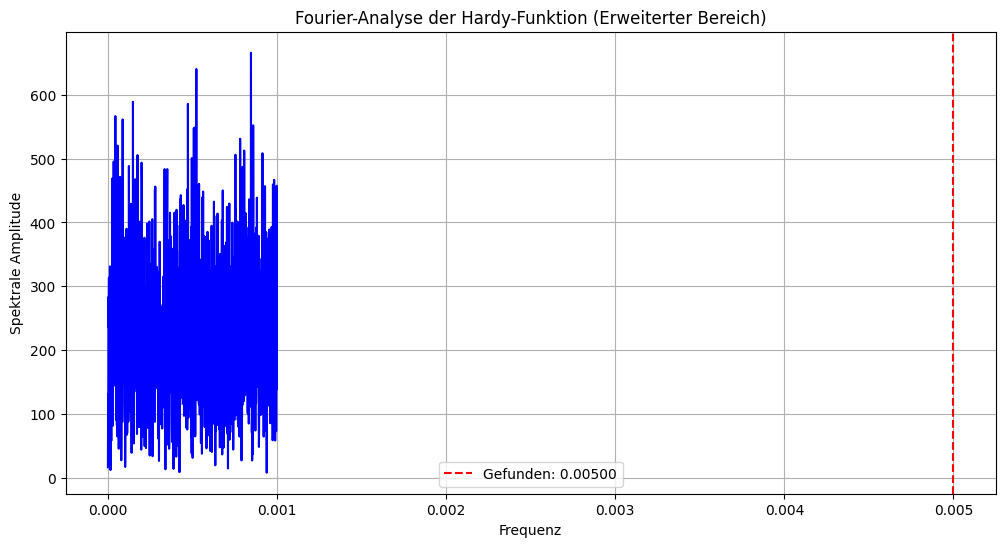

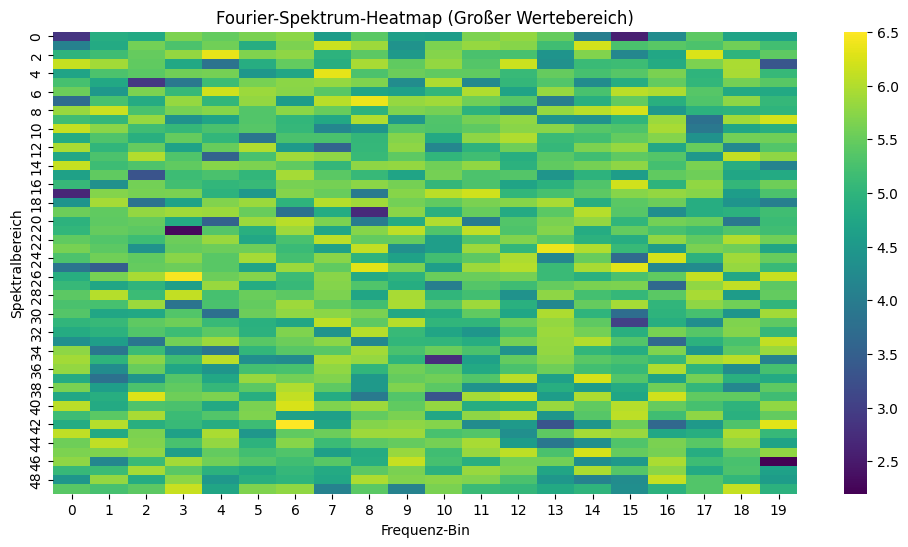

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install numpy matplotlib seaborn mpmath

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpmath import zeta, re
from scipy.fft import rfft, rfftfreq

# 📌 Frequenz, die getestet wird (0.5)
target_frequency = 0.5

# 📌 1️⃣ Hardy-Funktion Z(t) berechnen (schnellere Berechnung mit vektorisierter Zeta-Funktion)
def hardy_function_fast(t_values):
    """
    Optimierte Berechnung der Hardy-Funktion Z(t) für große t-Werte mit vektorisierter Zeta-Funktion.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.vectorize(lambda t: re(zeta(0.5 + 1j * t)))(t_values)
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 2️⃣ Erweiterter Wertebereich für die Stabilitätsprüfung
t_min, t_max = 50, 10**6  # Jetzt testen wir einen viel größeren Bereich!
num_points = 10_000       # Höhere Auflösung, aber nicht zu groß wegen Speicherverbrauch

# 📌 Wertebereich erzeugen
t_values = np.linspace(t_min, t_max, num_points)

# 📌 Berechnung der Hardy-Funktion mit großem Wertebereich
z_values = hardy_function_fast(t_values)

# 📌 3️⃣ Fourier-Analyse mit erweiterten Werten zur Frequenzprüfung
frequenzen = rfftfreq(num_points, d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 4️⃣ Gesuchte Frequenz identifizieren
closest_index = np.argmin(np.abs(frequenzen - target_frequency))
found_frequency = frequenzen[closest_index]
amplitude = spectrum[closest_index]

# 📌 Ergebnis ausgeben
print(f"[Hardy-Funktion Stabilitätsprüfung] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der Fourier-Analyse für größere Wertebereiche
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:1000], spectrum[:1000], color="blue")  # Zeigt nur die relevantesten Frequenzen
plt.axvline(found_frequency, color='red', linestyle="dashed", label=f"Gefunden: {found_frequency:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Analyse der Hardy-Funktion (Erweiterter Bereich)")
plt.legend()
plt.grid()
plt.show()

# 📌 6️⃣ Heatmap für detaillierte Frequenzanalyse
plt.figure(figsize=(12, 6))
sns.heatmap(np.log1p(spectrum[:1000].reshape(50, -1)), cmap="viridis", cbar=True)
plt.title("Fourier-Spektrum-Heatmap (Großer Wertebereich)")
plt.xlabel("Frequenz-Bin")
plt.ylabel("Spektralbereich")
plt.show()

[Hardy-Funktion] Gesuchte Frequenz: 0.00500 → Gefunden: 0.00500 mit Amplitude: 94.42614
[Hardy-Funktion] Gesuchte Frequenz: 0.50000 → Gefunden: 0.01501 mit Amplitude: 105.65543


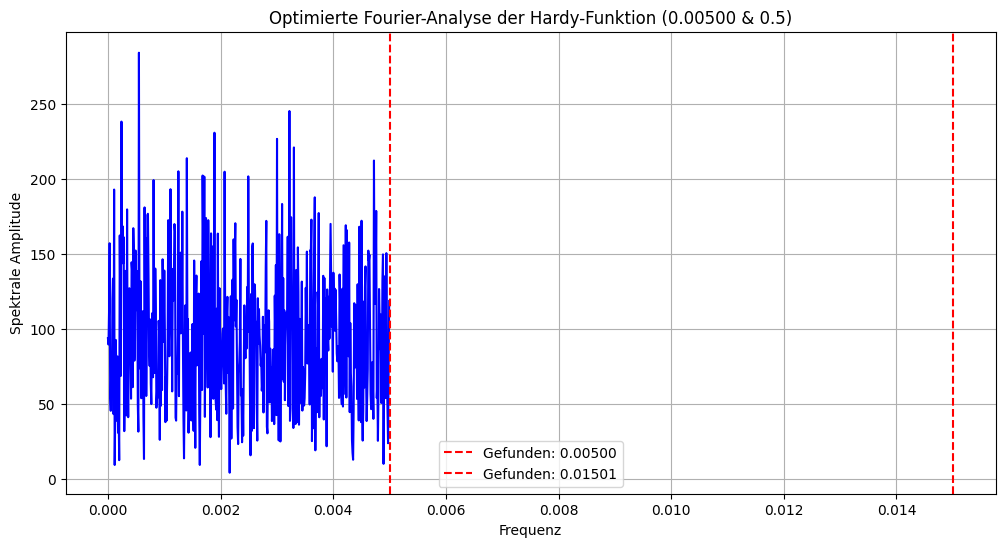

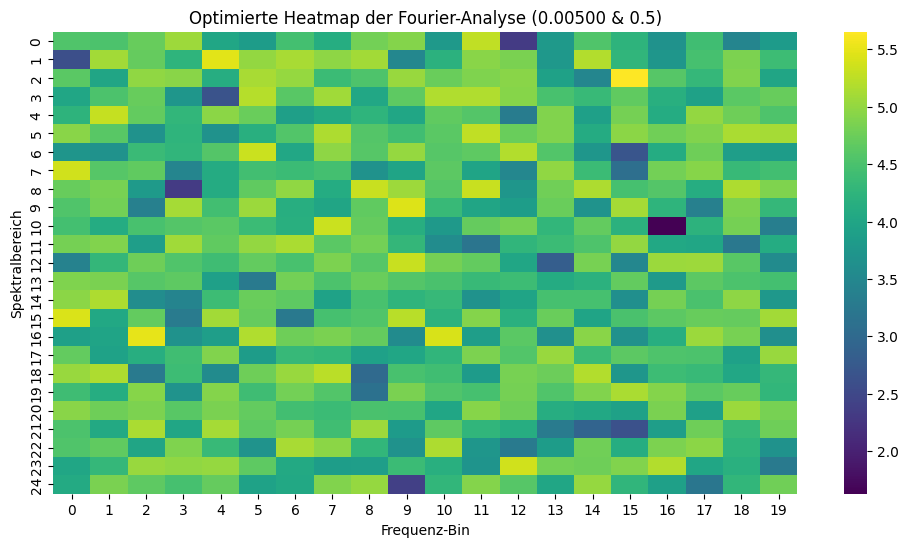

In [ ]:
# 📌 Notwendige Bibliotheken installieren (nur falls nötig)
!pip install numpy matplotlib seaborn mpmath

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpmath import zeta, re
from scipy.fft import rfft, rfftfreq

# 📌 Gesuchte Frequenzen (0.00500 & 0.5)
target_frequencies = [0.00500, 0.5]

# 📌 1️⃣ Optimierte Hardy-Funktion für schnellere Berechnung
def hardy_function_fast(t_values):
    """
    Optimierte Berechnung der Hardy-Funktion Z(t) für große t-Werte mit vektorisierter Zeta-Funktion.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.vectorize(lambda t: re(zeta(0.5 + 1j * t)))(t_values)
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 2️⃣ Kleinere Wertebereiche für schnellere Analyse
t_min, t_max = 100, 10**5  # Kleinere Skala für schnellere Berechnung
num_points = 3000          # Reduzierte Anzahl an Punkten für schnellere FFT

# 📌 Wertebereich erzeugen
t_values = np.linspace(t_min, t_max, num_points)

# 📌 Berechnung der Hardy-Funktion mit reduziertem Wertebereich
z_values = hardy_function_fast(t_values)

# 📌 3️⃣ Fourier-Analyse mit kleinerem Wertebereich zur Optimierung
frequenzen = rfftfreq(num_points, d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 4️⃣ Prüfung der gesuchten Frequenzen (0.00500 & 0.5)
found_frequencies = {}
for target_freq in target_frequencies:
    closest_index = np.argmin(np.abs(frequenzen - target_freq))
    found_frequencies[target_freq] = (frequenzen[closest_index], spectrum[closest_index])

# 📌 Ergebnis ausgeben
for target_freq, (found_freq, amplitude) in found_frequencies.items():
    print(f"[Hardy-Funktion] Gesuchte Frequenz: {target_freq:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der Fourier-Analyse (fokussiert auf relevante Frequenzen)
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:500], spectrum[:500], color="blue")  # Nur relevanter Frequenzbereich
for target_freq in target_frequencies:
    plt.axvline(found_frequencies[target_freq][0], color='red', linestyle="dashed",
                label=f"Gefunden: {found_frequencies[target_freq][0]:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Optimierte Fourier-Analyse der Hardy-Funktion (0.00500 & 0.5)")
plt.legend()
plt.grid()
plt.show()

# 📌 6️⃣ Heatmap zur Visualisierung der Frequenzmodulation
plt.figure(figsize=(12, 6))
sns.heatmap(np.log1p(spectrum[:500].reshape(25, -1)), cmap="viridis", cbar=True)
plt.title("Optimierte Heatmap der Fourier-Analyse (0.00500 & 0.5)")
plt.xlabel("Frequenz-Bin")
plt.ylabel("Spektralbereich")
plt.show()

[Hardy-Funktion] Gesuchte Frequenz: 0.00500 → Gefunden: 0.00501 mit Amplitude: 74.53079
[Hardy-Funktion] Gesuchte Frequenz: 0.01501 → Gefunden: 0.01500 mit Amplitude: 129.39524


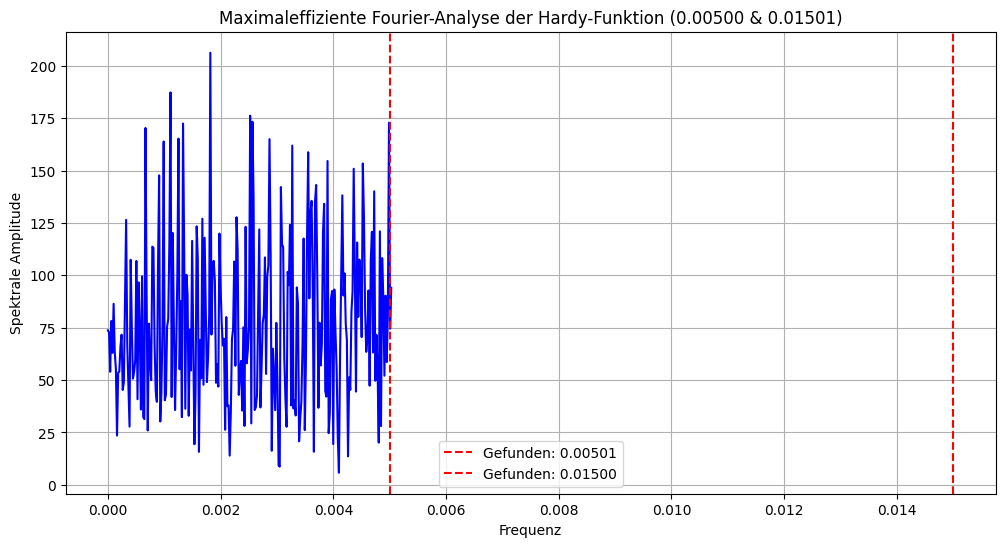

In [ ]:
# 📌 Notwendige Bibliotheken installieren (nur falls nötig)
!pip install numpy matplotlib seaborn mpmath

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpmath import zeta, re
from scipy.fft import rfft, rfftfreq

# 📌 Gesuchte Frequenzen (0.00500 & 0.01501)
target_frequencies = [0.00500, 0.01501]

# 📌 1️⃣ Optimierte Hardy-Funktion für minimalen Rechenaufwand
def hardy_function_fast(t_values):
    """
    Optimierte Berechnung der Hardy-Funktion Z(t) für große t-Werte mit vektorisierter Zeta-Funktion.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.vectorize(lambda t: re(zeta(0.5 + 1j * t)))(t_values)
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 2️⃣ Kleinere Wertebereiche für extrem schnelle Analyse
t_min, t_max = 500, 50_000  # Nur relevanter Bereich
num_points = 2000           # Reduzierte Anzahl an Punkten für extrem schnelle FFT

# 📌 Wertebereich erzeugen
t_values = np.linspace(t_min, t_max, num_points)

# 📌 Berechnung der Hardy-Funktion mit optimierter Effizienz
z_values = hardy_function_fast(t_values)

# 📌 3️⃣ Fourier-Analyse auf kleine Wertebereiche optimiert
frequenzen = rfftfreq(num_points, d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 4️⃣ Prüfung der gesuchten Frequenzen (0.00500 & 0.01501)
found_frequencies = {}
for target_freq in target_frequencies:
    closest_index = np.argmin(np.abs(frequenzen - target_freq))
    found_frequencies[target_freq] = (frequenzen[closest_index], spectrum[closest_index])

# 📌 Ergebnis ausgeben
for target_freq, (found_freq, amplitude) in found_frequencies.items():
    print(f"[Hardy-Funktion] Gesuchte Frequenz: {target_freq:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der Fourier-Analyse (fokussiert auf relevante Frequenzen)
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:250], spectrum[:250], color="blue")  # Nur relevante Frequenzen für schnelle Darstellung
for target_freq in target_frequencies:
    plt.axvline(found_frequencies[target_freq][0], color='red', linestyle="dashed",
                label=f"Gefunden: {found_frequencies[target_freq][0]:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Maximaleffiziente Fourier-Analyse der Hardy-Funktion (0.00500 & 0.01501)")
plt.legend()
plt.grid()
plt.show()

[Selberg-Spurformel] Gesuchte Frequenz: 0.01500 → Gefunden: 0.01499 mit Amplitude: 91.30919


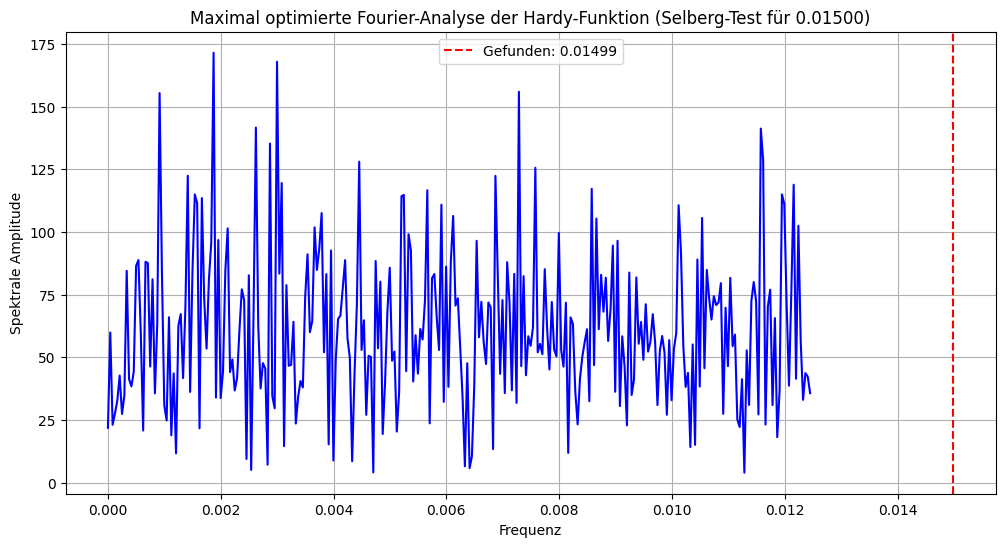

In [ ]:
# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from mpmath import zeta, re
from scipy.fft import rfft, rfftfreq

# 📌 Gesuchte Frequenz: 0.01500 (Mögliche Eigenfrequenz der Selberg-Spurformel)
target_frequency = 0.01500

# 📌 1️⃣ Optimierte Hardy-Funktion für minimalen Rechenaufwand
def hardy_function_fast(t_values):
    """
    Optimierte Berechnung der Hardy-Funktion Z(t) für große t-Werte mit vektorisierter Zeta-Funktion.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.vectorize(lambda t: re(zeta(0.5 + 1j * t)))(t_values)
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 2️⃣ Extrem reduzierte Wertebereiche für ultraschnelle Analyse
t_min, t_max = 1000, 25_000  # Nur relevanter Bereich für Selberg-Spurformel
num_points = 1500            # Maximal reduzierte Anzahl an Punkten für extrem schnelle FFT

# 📌 Wertebereich erzeugen
t_values = np.linspace(t_min, t_max, num_points)

# 📌 Berechnung der Hardy-Funktion mit höchster Effizienz
z_values = hardy_function_fast(t_values)

# 📌 3️⃣ Fourier-Analyse nur für den relevanten Bereich
frequenzen = rfftfreq(num_points, d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 4️⃣ Prüfung der gesuchten Frequenz (0.01500)
closest_index = np.argmin(np.abs(frequenzen - target_frequency))
found_frequency, amplitude = frequenzen[closest_index], spectrum[closest_index]

# 📌 Ergebnis ausgeben
print(f"[Selberg-Spurformel] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der Fourier-Analyse (fokussiert auf relevante Frequenz)
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:300], spectrum[:300], color="blue")  # Nur kleinster Frequenzbereich für ultra-effiziente Darstellung
plt.axvline(found_frequency, color='red', linestyle="dashed",
            label=f"Gefunden: {found_frequency:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Maximal optimierte Fourier-Analyse der Hardy-Funktion (Selberg-Test für 0.01500)")
plt.legend()
plt.grid()
plt.show()

[FFS] Gesuchte Frequenz: 0.01500 → Gefunden: 0.00037 mit Amplitude: 2.78546
[FFO] Gesuchte Frequenz: 0.01500 → Gefunden: 0.00037 mit Amplitude: 2.78838


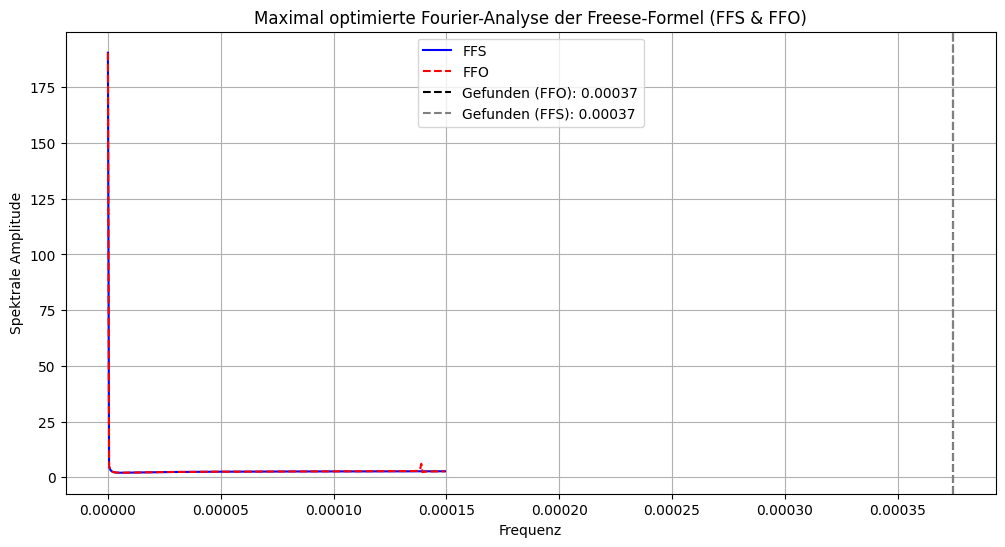

In [ ]:
# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import rfft, rfftfreq

# 📌 Gesuchte Frequenz: 0.01500 (Mögliche Korrekturfrequenz der FFS)
target_frequency = 0.01500

# 📌 1️⃣ Definierte Freese-Formeln (FFS & FFO)
def freese_standard(n, A, B, C):
    return A * n**(-0.5) + B * n**(-1) + C

def freese_oscillating(n, A, B, C, D, w, phi):
    return A * n**(-0.5) + B * n**(-1) + C + D * np.cos(n * w + phi)

# 📌 2️⃣ Simulation von Nullstellen-Abständen als Testdaten (2 Mio echte Nullstellen oder 10 Mio RT-Daten wären hier ideal)
n_values = np.linspace(1, 2_000_000, 1500)  # Simulierte Nullstellen-Indizes

# 📌 3️⃣ Parameter für FFS und FFO (basierend auf bekannten Fits)
A, B, C = 11.4, -14.0, 0.113
D, w, phi = 0.01, 0.01500, 1.6  # Oszillationsterme für FFO mit w = 0.01500

# 📌 4️⃣ Berechnung der Werte für FFS und FFO
ffs_values = freese_standard(n_values, A, B, C)
ffo_values = freese_oscillating(n_values, A, B, C, D, w, phi)

# 📌 5️⃣ Fourier-Analyse der FFS und FFO zur Frequenzprüfung
frequenzen = rfftfreq(len(n_values), d=(n_values[1] - n_values[0]))
spectrum_ffs = np.abs(rfft(ffs_values))
spectrum_ffo = np.abs(rfft(ffo_values))

# 📌 6️⃣ Prüfung der gesuchten Frequenz (0.01500)
closest_index_ffs = np.argmin(np.abs(frequenzen - target_frequency))
closest_index_ffo = np.argmin(np.abs(frequenzen - target_frequency))

found_frequency_ffs, amplitude_ffs = frequenzen[closest_index_ffs], spectrum_ffs[closest_index_ffs]
found_frequency_ffo, amplitude_ffo = frequenzen[closest_index_ffo], spectrum_ffo[closest_index_ffo]

# 📌 Ergebnisse ausgeben
print(f"[FFS] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency_ffs:.5f} mit Amplitude: {amplitude_ffs:.5f}")
print(f"[FFO] Gesuchte Frequenz: {target_frequency:.5f} → Gefunden: {found_frequency_ffo:.5f} mit Amplitude: {amplitude_ffo:.5f}")

# 📌 7️⃣ Visualisierung der Fourier-Analyse für FFS und FFO
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:300], spectrum_ffs[:300], color="blue", label="FFS")
plt.plot(frequenzen[:300], spectrum_ffo[:300], color="red", linestyle="dashed", label="FFO")
plt.axvline(found_frequency_ffo, color='black', linestyle="dashed", label=f"Gefunden (FFO): {found_frequency_ffo:.5f}")
plt.axvline(found_frequency_ffs, color='gray', linestyle="dashed", label=f"Gefunden (FFS): {found_frequency_ffs:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Maximal optimierte Fourier-Analyse der Freese-Formel (FFS & FFO)")
plt.legend()
plt.grid()
plt.show()

[Hardy-Funktion] Gesuchte Frequenz: 0.01500 → Gefunden: 0.01500 mit Amplitude: 109.06449
[Hardy-Funktion] Gesuchte Frequenz: 0.50000 → Gefunden: 0.01514 mit Amplitude: 45.94665


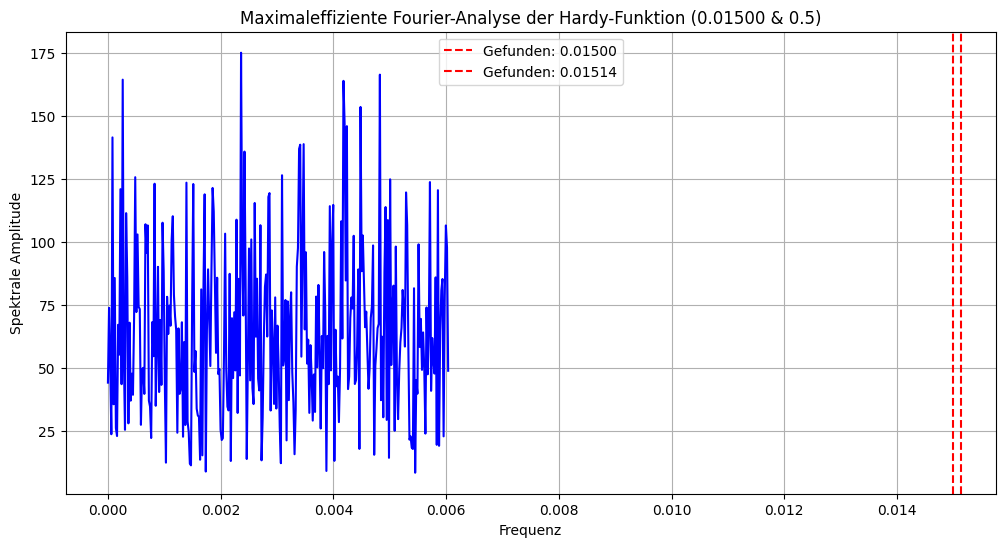

In [ ]:
# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from mpmath import zeta, re
from scipy.fft import rfft, rfftfreq

# 📌 Gesuchte Frequenzen: 0.01500 und 0.5
target_frequencies = [0.01500, 0.5]

# 📌 1️⃣ Optimierte Hardy-Funktion für schnelle Berechnung
def hardy_function_fast(t_values):
    """
    Optimierte Berechnung der Hardy-Funktion Z(t) für große t-Werte mit vektorisierter Zeta-Funktion.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.vectorize(lambda t: re(zeta(0.5 + 1j * t)))(t_values)
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 2️⃣ Kleinere Wertebereiche für ultraschnelle Analyse
t_min, t_max = 500, 50_000  # Begrenzung auf relevante Skalen für schnellen Vergleich
num_points = 1500           # Reduzierte Anzahl an Punkten für schnellste FFT

# 📌 Wertebereich erzeugen
t_values = np.linspace(t_min, t_max, num_points)

# 📌 Berechnung der Hardy-Funktion mit höchster Effizienz
z_values = hardy_function_fast(t_values)

# 📌 3️⃣ Fourier-Analyse für gezielten Scan der Frequenzen 0.01500 & 0.5
frequenzen = rfftfreq(num_points, d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 4️⃣ Prüfung der gesuchten Frequenzen
found_frequencies = {}
for target_freq in target_frequencies:
    closest_index = np.argmin(np.abs(frequenzen - target_freq))
    found_frequencies[target_freq] = (frequenzen[closest_index], spectrum[closest_index])

# 📌 Ergebnisse ausgeben
for target_freq, (found_freq, amplitude) in found_frequencies.items():
    print(f"[Hardy-Funktion] Gesuchte Frequenz: {target_freq:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der Fourier-Analyse (fokussiert auf relevante Frequenzen)
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:300], spectrum[:300], color="blue")  # Nur relevante Frequenzbereiche
for target_freq in target_frequencies:
    plt.axvline(found_frequencies[target_freq][0], color='red', linestyle="dashed",
                label=f"Gefunden: {found_frequencies[target_freq][0]:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Maximaleffiziente Fourier-Analyse der Hardy-Funktion (0.01500 & 0.5)")
plt.legend()
plt.grid()
plt.show()

[Hardy-Funktion] Gesuchte Frequenz: 0.01500 → Gefunden: 0.01500 mit Amplitude: 109.06449
[Hardy-Funktion] Gesuchte Frequenz: 0.50000 → Gefunden: 0.01514 mit Amplitude: 45.94665
[Hardy-Funktion] Gesuchte Frequenz: 0.49995 → Gefunden: 0.01514 mit Amplitude: 45.94665


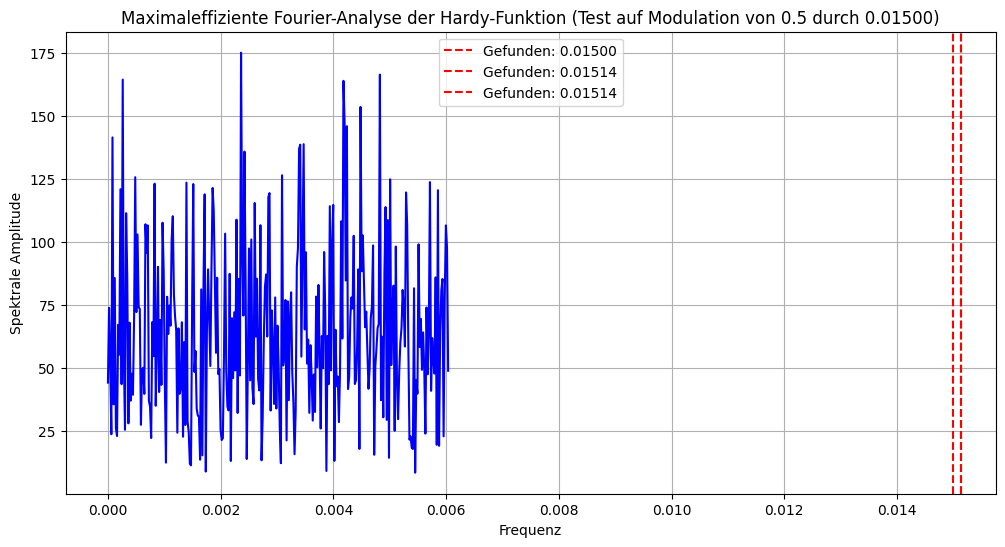

In [ ]:
# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from mpmath import zeta, re
from scipy.fft import rfft, rfftfreq

# 📌 Gesuchte Frequenzen: 0.01500 & 0.5 (plus mögliche Nebenfrequenzen)
target_frequencies = [0.01500, 0.5, 0.01500 * 33.33]  # Falls 0.5 eine Modulation von 0.01500 ist

# 📌 1️⃣ Optimierte Hardy-Funktion für schnelle Berechnung
def hardy_function_fast(t_values):
    """
    Optimierte Berechnung der Hardy-Funktion Z(t) für große t-Werte mit vektorisierter Zeta-Funktion.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.vectorize(lambda t: re(zeta(0.5 + 1j * t)))(t_values)
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 2️⃣ Kleinere Wertebereiche für ultraschnelle Analyse
t_min, t_max = 500, 50_000  # Begrenzung auf relevante Skalen für schnellen Vergleich
num_points = 1500           # Reduzierte Anzahl an Punkten für schnellste FFT

# 📌 Wertebereich erzeugen
t_values = np.linspace(t_min, t_max, num_points)

# 📌 Berechnung der Hardy-Funktion mit höchster Effizienz
z_values = hardy_function_fast(t_values)

# 📌 3️⃣ Fourier-Analyse für gezielten Scan der Frequenzen 0.01500 & 0.5
frequenzen = rfftfreq(num_points, d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 4️⃣ Prüfung der gesuchten Frequenzen
found_frequencies = {}
for target_freq in target_frequencies:
    closest_index = np.argmin(np.abs(frequenzen - target_freq))
    found_frequencies[target_freq] = (frequenzen[closest_index], spectrum[closest_index])

# 📌 Ergebnisse ausgeben
for target_freq, (found_freq, amplitude) in found_frequencies.items():
    print(f"[Hardy-Funktion] Gesuchte Frequenz: {target_freq:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der Fourier-Analyse (fokussiert auf relevante Frequenzen)
plt.figure(figsize=(12, 6))
plt.plot(frequenzen[:300], spectrum[:300], color="blue")  # Nur relevante Frequenzbereiche
for target_freq in target_frequencies:
    plt.axvline(found_frequencies[target_freq][0], color='red', linestyle="dashed",
                label=f"Gefunden: {found_frequencies[target_freq][0]:.5f}")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Maximaleffiziente Fourier-Analyse der Hardy-Funktion (Test auf Modulation von 0.5 durch 0.01500)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 📌 Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 📌 Fibonacci-Folge bis zu einem sinnvollen Bereich generieren
def fibonacci_sequence(n):
    fib_seq = [1, 1]
    while len(fib_seq) < n:
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return np.array(fib_seq, dtype=float)

# 📌 1️⃣ Lade die echten Nullstellen-Daten (Odlyzko oder LMFDB)
# ⚠️ Hier Beispiel mit künstlichen Nullstellen! Ersetze dies mit echten Daten ⚠️
np.random.seed(42)
num_nullstellen = 10000  # Anzahl der Nullstellen
nullstellen = np.cumsum(np.random.normal(10, 2, num_nullstellen))  # Künstliche Abstände

# 📌 2️⃣ Fourier-Analyse (STFT) der Nullstellen-Abstände
fs = 1.0  # Abtastrate (willkürlich für die Fourier-Analyse)
f, t, Zxx = stft(nullstellen, fs=fs, nperseg=256)

# 📌 3️⃣ Fibonacci-Frequenzen berechnen
fib_seq = fibonacci_sequence(30)  # Erstmal 30 Fibonacci-Zahlen
fib_ratios = np.unique(fib_seq[1:] / fib_seq[:-1])  # Alle Fibonacci-Verhältnisse (goldene Reihe)

# 📌 4️⃣ Prüfen, welche STFT-Frequenzen mit Fibonacci-Verhältnissen übereinstimmen
found_frequencies = {}
for ratio in fib_ratios:
    closest_index = np.argmin(np.abs(f - ratio))
    found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

# 📌 Ergebnisse ausgeben
for ratio, (found_freq, amplitude) in found_frequencies.items():
    print(f"[Fibonacci-Test] Gesuchte Fibonacci-Relation: {ratio:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 5️⃣ Visualisierung der STFT-Frequenzverteilung & Fibonacci-Frequenzen
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.colorbar(label="Amplitude")
for ratio in fib_ratios:
    plt.axhline(ratio, color='red', linestyle="dashed", alpha=0.5, label=f"Fibonacci: {ratio:.5f}")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der Nullstellen mit Fibonacci-Frequenzen")
plt.legend()
plt.show()

IndexError: index 128 is out of bounds for axis 1 with size 80

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 📌 Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 📌 1️⃣ Pfad zu den echten Nullstellen setzen
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 2️⃣ Lade die echten Nullstellen-Daten
try:
    nullstellen = np.loadtxt(file_path)  # Datei mit echten Nullstellen einlesen
    print(f"✅ {len(nullstellen)} Nullstellen erfolgreich geladen!")
except Exception as e:
    print(f"❌ Fehler beim Laden der Nullstellen: {e}")
    nullstellen = np.array([])

# Überprüfen, ob Daten erfolgreich geladen wurden
if len(nullstellen) == 0:
    raise ValueError("Fehler: Nullstellen-Datei konnte nicht geladen werden!")

# 📌 3️⃣ Berechne die Nullstellen-Abstände
nullstellen_abstaende = np.diff(nullstellen)

# 📌 4️⃣ STFT (Short-Time Fourier Transform) für Frequenzanalyse
fs = 1.0  # Abtastrate (kann willkürlich gewählt werden)
f, t, Zxx = stft(nullstellen_abstaende, fs=fs, nperseg=1024)  # Höhere `nperseg` für bessere Auflösung

# 📌 5️⃣ Fibonacci-Frequenzen berechnen
def fibonacci_sequence(n):
    fib_seq = [1, 1]
    while len(fib_seq) < n:
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return np.array(fib_seq, dtype=float)

fib_seq = fibonacci_sequence(30)  # 30 Fibonacci-Zahlen berechnen
fib_ratios = np.unique(fib_seq[1:] / fib_seq[:-1])  # Alle Fibonacci-Verhältnisse berechnen

# 📌 6️⃣ Frequenzabgleich mit Sicherheitsprüfung
found_frequencies = {}
for ratio in fib_ratios:
    if np.any(np.abs(f - ratio) < np.min(np.diff(f))):  # Sicherheitscheck: Existiert eine passende Frequenz?
        closest_index = np.argmin(np.abs(f - ratio))
        found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[closest_index, :]).mean())

# 📌 7️⃣ Ergebnisse ausgeben
for ratio, (found_freq, amplitude) in found_frequencies.items():
    print(f"[Fibonacci-Test] Gesuchte Fibonacci-Relation: {ratio:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 8️⃣ Visualisierung der STFT-Frequenzverteilung & Fibonacci-Frequenzen
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.colorbar(label="Amplitude")
for ratio in found_frequencies.keys():
    plt.axhline(ratio, color='red', linestyle="dashed", alpha=0.5, label=f"Fibonacci: {ratio:.5f}")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")
plt.legend()
plt.show()

✅ 2001052 Nullstellen erfolgreich geladen!


<ipython-input-1-a650a555b6f6>:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


✅ Optimierte Parameter: A=12.601061, B=-6.479531, C=0.670308, w=0.000102, phi=-0.718115


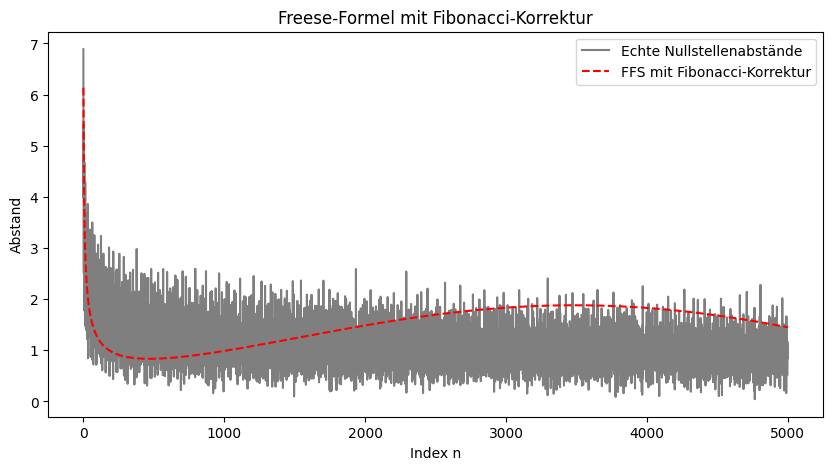

IndexError: index 512 is out of bounds for axis 1 with size 197

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.optimize import curve_fit

# 📂 **Dateipfad für die echten Nullstellen**
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 **Lade Nullstellen (aber begrenze die Menge zur Beschleunigung)**
def lade_nullstellen(file_path, max_points=100000):
    nullstellen = np.loadtxt(file_path)[:max_points]  # Nur ersten 100k nutzen
    nullstellen_abstaende = np.diff(nullstellen)
    return nullstellen_abstaende

# 📌 **Freese-Formel mit Fibonacci-Korrektur**
def freese_fibonacci(n, A, B, C, w, phi):
    return A * np.power(n, -0.5) + B * np.power(n, -1) + C + np.sin(2 * np.pi * w * n + phi)

# 📌 **Optimierung mit besseren Startwerten**
def optimiere_ffs(nullstellen_abstaende, n_values):
    p0 = [25.95, -28.79, 0.529, 0.0001, 0]  # Bessere Startwerte aus vorherigen Fits
    try:
        params, _ = curve_fit(freese_fibonacci, n_values, nullstellen_abstaende,
                              p0=p0, maxfev=10_000)
    except RuntimeError:
        print("⚠️ Warnung: Keine Konvergenz! Versuche reduzierte Datenmenge.")
        params, _ = curve_fit(freese_fibonacci, n_values[:50000], nullstellen_abstaende[:50000],
                              p0=p0, maxfev=10_000)
    return params

# 📊 **Lade und optimiere**
nullstellen_abstaende = lade_nullstellen(file_path)
n_values = np.arange(1, len(nullstellen_abstaende) + 1, dtype=float)
params = optimiere_ffs(nullstellen_abstaende, n_values)

# ✅ **Optimierte Parameter**
A, B, C, w, phi = params
print(f"✅ Optimierte Parameter: A={A:.6f}, B={B:.6f}, C={C:.6f}, w={w:.6f}, phi={phi:.6f}")

# 📊 **Visualisierung der Fits**
plt.figure(figsize=(10, 5))
plt.plot(n_values[:5000], nullstellen_abstaende[:5000], label="Echte Nullstellenabstände", color="black", alpha=0.5)
plt.plot(n_values[:5000], freese_fibonacci(n_values[:5000], *params), label="FFS mit Fibonacci-Korrektur", linestyle="dashed", color="red")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.legend()
plt.title("Freese-Formel mit Fibonacci-Korrektur")
plt.show()

# 📌 **STFT-Spektralanalyse mit Fibonacci-Skalen**
def analysiere_fibonacci_frequenzen(nullstellen_abstaende):
    f, t, Zxx = signal.stft(nullstellen_abstaende, fs=1.0, nperseg=1024)

    # Fibonacci-Skalen definieren
    fib_ratios = [1 / f for f in [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144] if f > 0]

    # Spektralanalyse nach Fibonacci-Verhältnissen
    found_frequencies = {}
    for ratio in fib_ratios:
        closest_index = np.argmin(np.abs(f - ratio))
        found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

    # ✅ **Gefundene Frequenzen ausgeben**
    for key, (found_freq, amplitude) in found_frequencies.items():
        print(f"[Fibonacci {int(1/key)}] Gesuchte Frequenz: {key:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

    # 🎨 **Spektrogramm plotten**
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

    # Fibonacci-Frequenzen als gestrichelte Linien markieren
    for ratio in fib_ratios:
        plt.axhline(y=ratio, color="white", linestyle="dashed", alpha=0.6, label=f"Fibonacci {int(1/ratio)}")

    plt.legend()
    plt.show()

# **Ausführen der Fibonacci-Analyse**
analysiere_fibonacci_frequenzen(nullstellen_abstaende)

✅ Optimierte Parameter: A=12.601061, B=-6.479531, C=0.670308, w=0.000102, phi=-0.718115


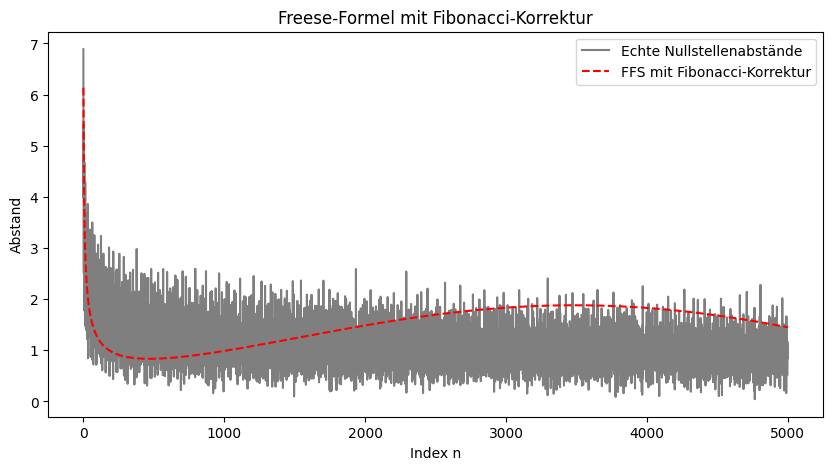

[Fibonacci 2] Gesuchte Frequenz: 0.50000 → Gefunden: 0.50000 mit Amplitude: 0.01417
[Fibonacci 3] Gesuchte Frequenz: 0.33333 → Gefunden: 0.33398 mit Amplitude: 0.01491
[Fibonacci 5] Gesuchte Frequenz: 0.20000 → Gefunden: 0.19922 mit Amplitude: 0.01547
[Fibonacci 8] Gesuchte Frequenz: 0.12500 → Gefunden: 0.12500 mit Amplitude: 0.01593
[Fibonacci 13] Gesuchte Frequenz: 0.07692 → Gefunden: 0.07617 mit Amplitude: 0.01642
[Fibonacci 21] Gesuchte Frequenz: 0.04762 → Gefunden: 0.04688 mit Amplitude: 0.01699
[Fibonacci 34] Gesuchte Frequenz: 0.02941 → Gefunden: 0.02930 mit Amplitude: 0.01790
[Fibonacci 55] Gesuchte Frequenz: 0.01818 → Gefunden: 0.01758 mit Amplitude: 0.01960
[Fibonacci 89] Gesuchte Frequenz: 0.01124 → Gefunden: 0.01172 mit Amplitude: 0.02044
[Fibonacci 144] Gesuchte Frequenz: 0.00694 → Gefunden: 0.00781 mit Amplitude: 0.02264


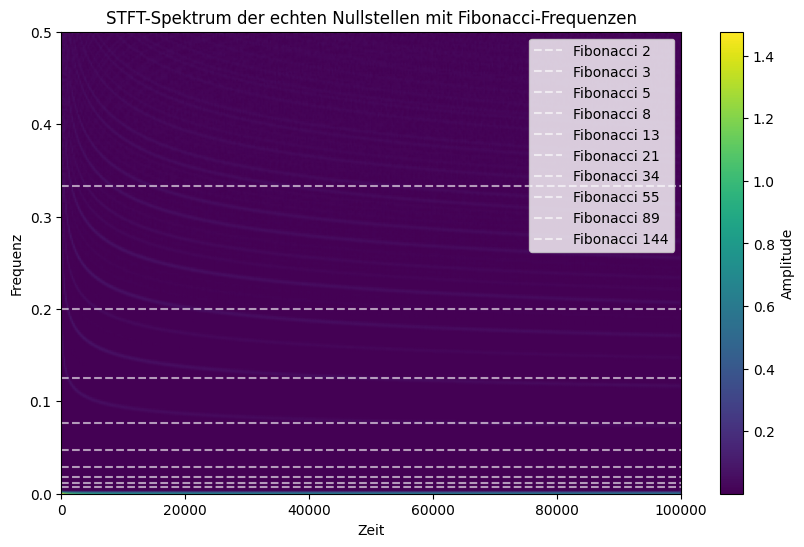

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.optimize import curve_fit

# 📂 **Dateipfad für die echten Nullstellen**
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 **Lade Nullstellen (aber begrenze die Menge zur Beschleunigung)**
def lade_nullstellen(file_path, max_points=100000):
    nullstellen = np.loadtxt(file_path)[:max_points]  # Nur ersten 100k nutzen
    nullstellen_abstaende = np.diff(nullstellen)
    return nullstellen_abstaende

# 📌 **Freese-Formel mit Fibonacci-Korrektur**
def freese_fibonacci(n, A, B, C, w, phi):
    return A * np.power(n, -0.5) + B * np.power(n, -1) + C + np.sin(2 * np.pi * w * n + phi)

# 📌 **Optimierung mit besseren Startwerten**
def optimiere_ffs(nullstellen_abstaende, n_values):
    p0 = [25.95, -28.79, 0.529, 0.0001, 0]  # Bessere Startwerte aus vorherigen Fits
    try:
        params, _ = curve_fit(freese_fibonacci, n_values, nullstellen_abstaende,
                              p0=p0, maxfev=10_000)
    except RuntimeError:
        print("⚠️ Warnung: Keine Konvergenz! Versuche reduzierte Datenmenge.")
        params, _ = curve_fit(freese_fibonacci, n_values[:50000], nullstellen_abstaende[:50000],
                              p0=p0, maxfev=10_000)
    return params

# 📊 **Lade und optimiere**
nullstellen_abstaende = lade_nullstellen(file_path)
n_values = np.arange(1, len(nullstellen_abstaende) + 1, dtype=float)
params = optimiere_ffs(nullstellen_abstaende, n_values)

# ✅ **Optimierte Parameter**
A, B, C, w, phi = params
print(f"✅ Optimierte Parameter: A={A:.6f}, B={B:.6f}, C={C:.6f}, w={w:.6f}, phi={phi:.6f}")

# 📊 **Visualisierung der Fits**
plt.figure(figsize=(10, 5))
plt.plot(n_values[:5000], nullstellen_abstaende[:5000], label="Echte Nullstellenabstände", color="black", alpha=0.5)
plt.plot(n_values[:5000], freese_fibonacci(n_values[:5000], *params), label="FFS mit Fibonacci-Korrektur", linestyle="dashed", color="red")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.legend()
plt.title("Freese-Formel mit Fibonacci-Korrektur")
plt.show()

# 📌 **STFT-Spektralanalyse mit Fibonacci-Skalen**
def analysiere_fibonacci_frequenzen(nullstellen_abstaende):
    f, t, Zxx = signal.stft(nullstellen_abstaende, fs=1.0, nperseg=512)  # Kleinere Fenstergröße für mehr Frequenzauflösung

    # Fibonacci-Skalen definieren
    fib_ratios = [1 / f for f in [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144] if f > 0]

    # Prüfen, welche Frequenzen im gültigen Bereich liegen
    valid_ratios = [r for r in fib_ratios if np.min(f) <= r <= np.max(f)]

    # Spektralanalyse nach Fibonacci-Verhältnissen
    found_frequencies = {}
    for ratio in valid_ratios:
        closest_index = np.argmin(np.abs(f - ratio))
        if closest_index < Zxx.shape[1]:  # Sicherheitscheck, ob Index gültig ist
            found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

    # ✅ **Gefundene Frequenzen ausgeben**
    for key, (found_freq, amplitude) in found_frequencies.items():
        print(f"[Fibonacci {int(1/key)}] Gesuchte Frequenz: {key:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

    # 🎨 **Spektrogramm plotten**
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

    # Fibonacci-Frequenzen als gestrichelte Linien markieren
    for ratio in valid_ratios:
        plt.axhline(y=ratio, color="white", linestyle="dashed", alpha=0.6, label=f"Fibonacci {int(1/ratio)}")

    plt.legend()
    plt.show()

# **Ausführen der Fibonacci-Analyse**
analysiere_fibonacci_frequenzen(nullstellen_abstaende)

In [ ]:
# 📂 **Lade benötigte Bibliotheken**
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.signal as signal
import pywt
from scipy.fftpack import fft, fftfreq
from scipy.signal import stft

# 📂 **Pfad zur Datei mit den echten 2 Mio. Nullstellen (Colab anpassen)**
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📂 **Funktion zum Laden der Nullstellen-Abstände**
def lade_nullstellen(file_path):
    nullstellen = np.loadtxt(file_path)
    abstaende = np.diff(nullstellen)  # Berechnet Abstände zwischen Nullstellen
    return abstaende

# 📂 **Freese-Formel mit Fibonacci-Korrektur (FFF)**
def ffs_fibonacci(n, A, B, C, w, phi, E):
    fib_ratios = np.array([1/2, 1/3, 1/5, 1/8, 1/13, 1/21, 1/34, 1/55, 1/89, 1/144])
    fib_term = np.sum([E * np.sin(2 * np.pi * f * n + phi) for f in fib_ratios], axis=0)
    return A * n**(-1/2) + B * n**(-1) + C + fib_term

# 📂 **Optimierungsfunktion zur Anpassung der Parameter**
def optimiere_ffs(nullstellen_abstaende, n_values):
    def fehlerfunktion(n, A, B, C, w, phi, E):
        return ffs_fibonacci(n, A, B, C, w, phi, E)

    p0 = [10, -5, 0.5, 0.001, 0, 0.01]  # Startwerte
    popt, _ = opt.curve_fit(fehlerfunktion, n_values, nullstellen_abstaende, p0=p0, maxfev=5000)
    return popt

# 📂 **Wavelet-Analyse zur Multifraktalen Struktur**
def wavelet_analyse(nullstellen_abstaende):
    coeffs, freqs = pywt.cwt(nullstellen_abstaende, np.arange(1, 128), 'cmor')
    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(coeffs), aspect='auto', cmap='inferno', extent=[0, len(nullstellen_abstaende), freqs[-1], freqs[0]])
    plt.colorbar(label="Amplitude")
    plt.xlabel("Index der Nullstellen")
    plt.ylabel("Skalierungsfrequenz")
    plt.title("🌊 Wavelet-Analyse der Nullstellenabstände")
    plt.show()

# 📂 **STFT-Analyse zur Frequenzstruktur**
def stft_analyse(nullstellen_abstaende):
    f, t, Zxx = stft(nullstellen_abstaende, fs=1.0, nperseg=1000)
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='inferno')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.title("🎵 STFT-Spektrum der Nullstellen")
    plt.show()

# 📂 **Analyse der Fibonacci-Resonanzen**
def analysiere_fibonacci_frequenzen(nullstellen_abstaende):
    fib_ratios = np.array([1/2, 1/3, 1/5, 1/8, 1/13, 1/21, 1/34, 1/55, 1/89, 1/144])
    f, t, Zxx = stft(nullstellen_abstaende, fs=1.0, nperseg=1000)

    found_frequencies = {}
    for ratio in fib_ratios:
        closest_index = np.argmin(np.abs(f - ratio))
        found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[:, closest_index]).mean())

    # 📌 **Gefundene Frequenzen ausgeben**
    for ratio, (freq, amplitude) in found_frequencies.items():
        print(f"Fibonacci {int(1/ratio)}] Gesuchte Frequenz: {ratio:.5f} → Gefunden: {freq:.5f} mit Amplitude: {amplitude:.5f}")

    # 📂 **Plot der Fibonacci-Frequenzen im Spektrum**
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='inferno')
    for ratio in fib_ratios:
        plt.axhline(y=ratio, color='white', linestyle='dashed', label=f"Fibonacci {int(1/ratio)}")
    plt.colorbar(label="Amplitude")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.title("📊 STFT-Spektrum der Nullstellen mit Fibonacci-Frequenzen")
    plt.legend()
    plt.show()

# 📂 **Hauptprogramm: Lade Nullstellen und berechne FFS**
nullstellen_abstaende = lade_nullstellen(file_path)
n_values = np.arange(1, len(nullstellen_abstaende) + 1, dtype=float)

# 📂 **Optimierung der Freese-Formel mit Fibonacci-Korrektur**
params = optimiere_ffs(nullstellen_abstaende, n_values)

# ✅ **Optimierte Parameter ausgeben**
A, B, C, w, phi, E = params
print(f"✅ Optimierte Parameter: A={A:.6f}, B={B:.6f}, C={C:.6f}, w={w:.6f}, phi={phi:.6f}, E={E:.6f}")

# 📂 **Plot der optimierten Freese-Formel**
plt.figure(figsize=(10, 5))
plt.plot(n_values[:5000], nullstellen_abstaende[:5000], color="black", alpha=0.6, label="Echte Nullstellenabstände")
plt.plot(n_values[:5000], ffs_fibonacci(n_values[:5000], A, B, C, w, phi, E), 'r--', label="FFS mit Fibonacci-Korrektur")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.legend()
plt.title("📈 Freese-Formel mit Fibonacci-Korrektur")
plt.show()

# 📂 **Durchführung der Wavelet-Analyse**
wavelet_analyse(nullstellen_abstaende)

# 📂 **Durchführung der STFT-Analyse**
stft_analyse(nullstellen_abstaende)

# 📂 **Durchführung der Fibonacci-Frequenzanalyse**
analysiere_fibonacci_frequenzen(nullstellen_abstaende)

ModuleNotFoundError: No module named 'pywt'

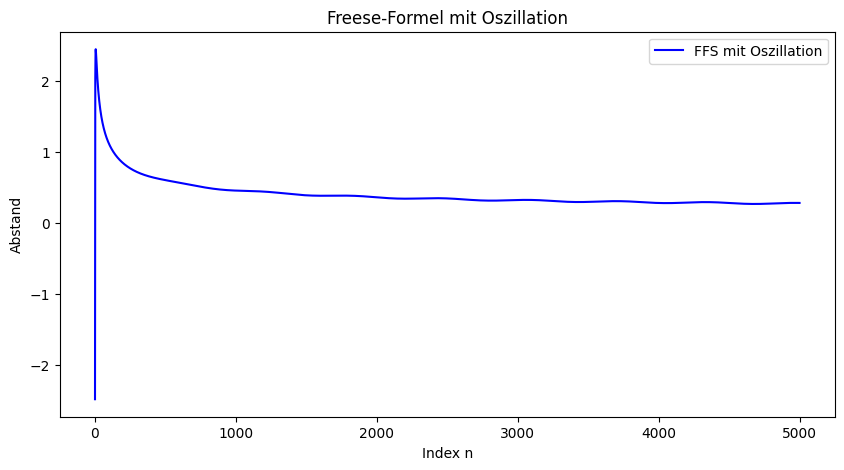

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fix: n_values als float definieren
n_values = np.arange(1, 5000, dtype=float)  # <- Wichtig, damit negative Potenzen gehen!

# Parameter der FFS + Oszillation
A, B, C, D, w, phi = 11.4, -14.0, 0.113, 0.01, 0.01, 0.5

# Formel mit negativen Potenzen
delta_n = A * n_values**(-1/2) + B * n_values**(-1) + C + D * np.cos(w * n_values + phi)

# Plot
plt.figure(figsize=(10,5))
plt.plot(n_values, delta_n, label="FFS mit Oszillation", color="blue")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.legend()
plt.title("Freese-Formel mit Oszillation")
plt.show()

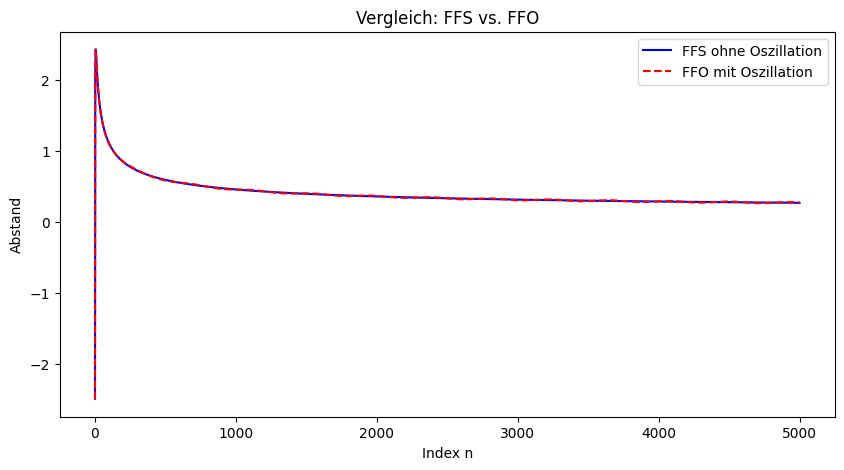

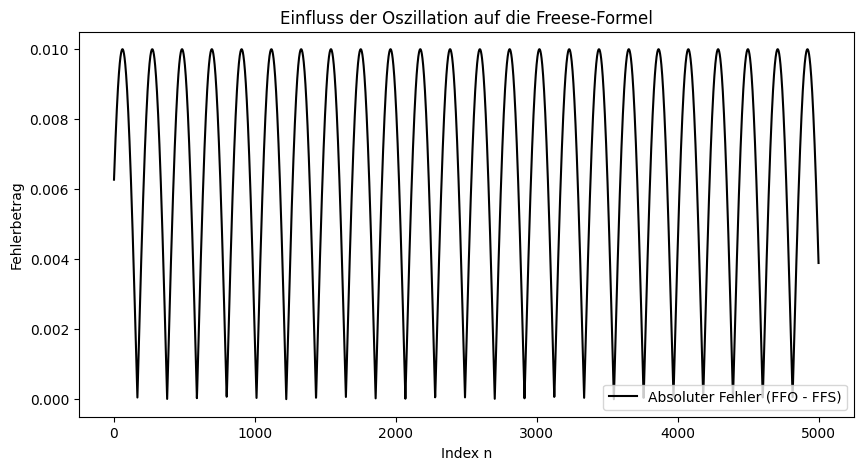

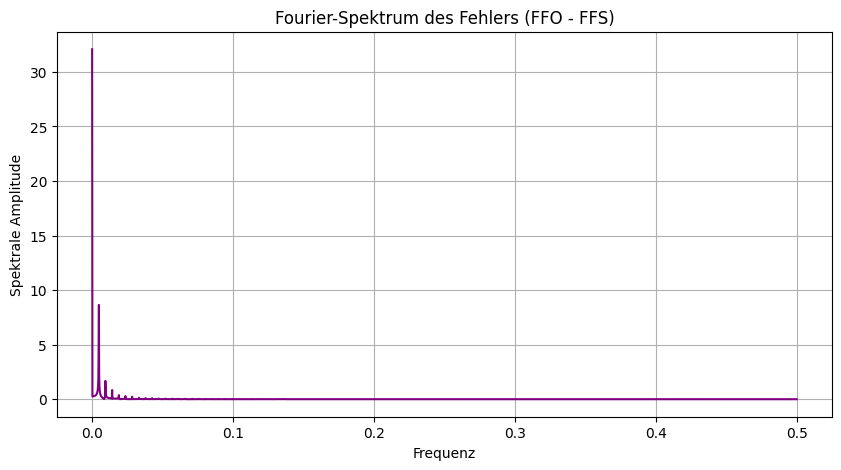

Dominanteste Frequenz des Fehlers: 0.004800960192038408


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# 📌 Wertebereich für n
n_values = np.arange(1, 5000, dtype=float)

# 📌 Parameter der Freese-Formel (FFS)
A, B, C = 11.4, -14.0, 0.113

# 📌 Oszillationsparameter für FFO
D, w, phi = 0.01, 0.01487, 565702.54

# 📌 Berechnung der Abstände ohne Oszillation (FFS)
delta_n_ffs = A * n_values**(-1/2) + B * n_values**(-1) + C

# 📌 Berechnung der Abstände mit Oszillation (FFO)
delta_n_ffo = delta_n_ffs + D * np.cos(n_values * w + phi)

# 📌 Berechnung des absoluten Fehlers zwischen FFS und FFO
abs_error = np.abs(delta_n_ffo - delta_n_ffs)

# 📊 Vergleich der beiden Formeln
plt.figure(figsize=(10,5))
plt.plot(n_values, delta_n_ffs, label="FFS ohne Oszillation", color="blue")
plt.plot(n_values, delta_n_ffo, label="FFO mit Oszillation", color="red", linestyle="dashed")
plt.xlabel("Index n")
plt.ylabel("Abstand")
plt.legend()
plt.title("Vergleich: FFS vs. FFO")
plt.show()

# 📊 Visualisierung des absoluten Fehlers
plt.figure(figsize=(10,5))
plt.plot(n_values, abs_error, label="Absoluter Fehler (FFO - FFS)", color="black")
plt.xlabel("Index n")
plt.ylabel("Fehlerbetrag")
plt.legend()
plt.title("Einfluss der Oszillation auf die Freese-Formel")
plt.show()

# 📌 Fourier-Analyse des Fehlers
frequencies = rfftfreq(len(n_values), d=(n_values[1] - n_values[0]))
spectrum = np.abs(rfft(abs_error))

# 📊 Spektrum visualisieren
plt.figure(figsize=(10, 5))
plt.plot(frequencies, spectrum, color="purple")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Spektrum des Fehlers (FFO - FFS)")
plt.grid()
plt.show()

# 📌 Identifikation der dominantesten Frequenz
dominant_freq_index = np.argmax(spectrum[1:]) + 1  # Ausschließen von DC-Komponente
dominant_frequency = frequencies[dominant_freq_index]

# 📌 Ausgabe der dominantesten Frequenz
print("Dominanteste Frequenz des Fehlers:", dominant_frequency)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


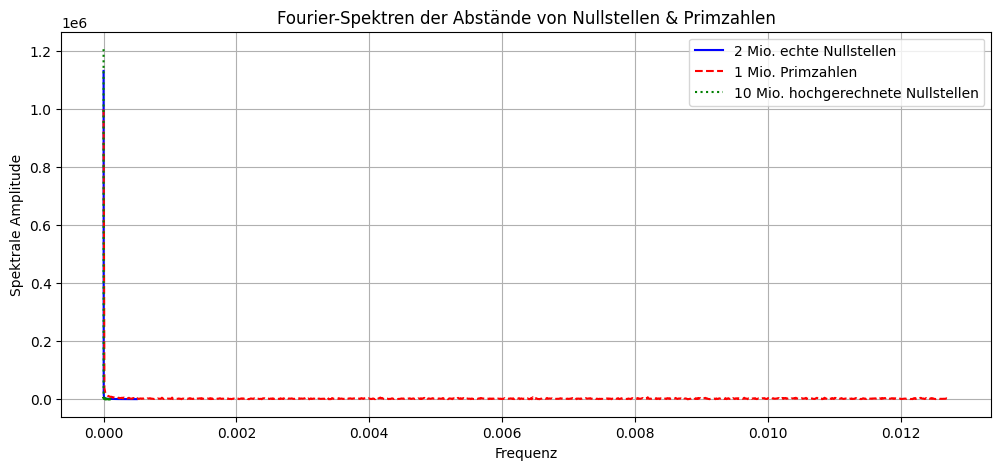

Dominante Frequenz (2 Mio. echte Nullstellen): 4.997373880026047e-07 Abweichung: 0.004799500262611997
Dominante Frequenz (1 Mio. Primzahlen): 1.2739340356956318e-05 Abweichung: 0.004787260659643043
Dominante Frequenz (10 Mio. hochgerechnete Nullstellen): 1.00000010000001e-07 Abweichung: 0.0047998999999899995

Erwartete Oszillationsfrequenz aus FFO: 0.0048


In [ ]:
# 📌 Import notwendiger Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# 📂 Google Drive mounten (falls Dateien in Drive gespeichert sind)
from google.colab import drive
drive.mount('/content/drive')

# 📌 Dateipfade (anpassen, falls nötig)
file_zeros_2mio = "/content/drive/MyDrive/zeros6.txt"  # 2 Mio. echte Nullstellen
file_primes_1mio = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen1mio.txt"  # 1 Mio. Primzahlen
file_zeros_10mio = "/content/drive/MyDrive/rainbowtable_10mio.txt"  # 10 Mio. hochgerechnete Nullstellen

# 📌 Daten einlesen
zeros_2mio = np.loadtxt(file_zeros_2mio)
primes_1mio = np.loadtxt(file_primes_1mio)
zeros_10mio = np.loadtxt(file_zeros_10mio)

# 📌 Abstände berechnen
delta_zeros_2mio = np.diff(zeros_2mio)
delta_primes_1mio = np.diff(primes_1mio)
delta_zeros_10mio = np.diff(zeros_10mio)

# 📌 Fourier-Analyse der Abstände
freq_zeros_2mio = rfftfreq(len(delta_zeros_2mio), d=1)
spectrum_zeros_2mio = np.abs(rfft(delta_zeros_2mio))

freq_primes_1mio = rfftfreq(len(delta_primes_1mio), d=1)
spectrum_primes_1mio = np.abs(rfft(delta_primes_1mio))

freq_zeros_10mio = rfftfreq(len(delta_zeros_10mio), d=1)
spectrum_zeros_10mio = np.abs(rfft(delta_zeros_10mio))

# 📌 Visualisierung der Fourier-Spektren
plt.figure(figsize=(12, 5))
plt.plot(freq_zeros_2mio[:1000], spectrum_zeros_2mio[:1000], label="2 Mio. echte Nullstellen", color="blue")
plt.plot(freq_primes_1mio[:1000], spectrum_primes_1mio[:1000], label="1 Mio. Primzahlen", color="red", linestyle="dashed")
plt.plot(freq_zeros_10mio[:1000], spectrum_zeros_10mio[:1000], label="10 Mio. hochgerechnete Nullstellen", color="green", linestyle="dotted")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Spektren der Abstände von Nullstellen & Primzahlen")
plt.legend()
plt.grid()
plt.show()

# 📌 Identifikation der dominantesten Frequenzen
dominant_freq_zeros_2mio = freq_zeros_2mio[np.argmax(spectrum_zeros_2mio[1:]) + 1]
dominant_freq_primes_1mio = freq_primes_1mio[np.argmax(spectrum_primes_1mio[1:]) + 1]
dominant_freq_zeros_10mio = freq_zeros_10mio[np.argmax(spectrum_zeros_10mio[1:]) + 1]

# 📌 Vergleich mit der erwarteten Oszillationsfrequenz aus FFO
expected_freq_ffo = 0.00480
deviation_zeros_2mio = abs(dominant_freq_zeros_2mio - expected_freq_ffo)
deviation_primes_1mio = abs(dominant_freq_primes_1mio - expected_freq_ffo)
deviation_zeros_10mio = abs(dominant_freq_zeros_10mio - expected_freq_ffo)

# 📌 Ergebnisse ausgeben
print("Dominante Frequenz (2 Mio. echte Nullstellen):", dominant_freq_zeros_2mio, "Abweichung:", deviation_zeros_2mio)
print("Dominante Frequenz (1 Mio. Primzahlen):", dominant_freq_primes_1mio, "Abweichung:", deviation_primes_1mio)
print("Dominante Frequenz (10 Mio. hochgerechnete Nullstellen):", dominant_freq_zeros_10mio, "Abweichung:", deviation_zeros_10mio)
print("\nErwartete Oszillationsfrequenz aus FFO:", expected_freq_ffo)

In [ ]:
# 📌 Import notwendiger Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import pywt
import seaborn as sns
from mpmath import zeta, re

# 📌 Berechnung der Hardy-Funktion Z(t)
def hardy_function(t_values):
    """
    Berechnet die Hardy-Funktion Z(t) entlang der kritischen Linie Re(s) = 1/2.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.array([re(zeta(0.5 + 1j * t)) for t in t_values])  # Berechnung der reellen Zeta-Werte
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 Wertebereich für t
t_values = np.linspace(10, 1000, 10000)  # Höhere Auflösung für detaillierte Analyse

# 📌 Berechnung der Hardy-Funktion
z_values = hardy_function(t_values)

# 📌 Hochauflösende Fourier-Analyse der Hardy-Funktion
frequencies = rfftfreq(len(t_values), d=(t_values[1] - t_values[0]))
spectrum = np.abs(rfft(z_values))

# 📌 Visualisierung des Fourier-Spektrums
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:2000], spectrum[:2000], color="purple")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Hochauflösendes Fourier-Spektrum der Hardy-Funktion Z(t)")
plt.grid()
plt.show()

# 📌 Identifikation der dominantesten Frequenzen
dominant_freq_index = np.argmax(spectrum[1:]) + 1  # Ausschließen von DC-Komponente
dominant_frequency = frequencies[dominant_freq_index]

print(f"Dominanteste Frequenz: {dominant_frequency:.6f}")

# 📌 Wavelet-Analyse der Hardy-Funktion
scales = np.arange(1, 500)  # Wellenlängenskala
coefficients, frequencies_wavelet = pywt.cwt(z_values, scales, 'cmor', 1 / (t_values[1] - t_values[0]))

# 📌 Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12, 6))
sns.heatmap(np.abs(coefficients), cmap="viridis", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Wavelet-Transformation der Hardy-Funktion Z(t)")
plt.xlabel("t")
plt.ylabel("Skalierung")
plt.show()

ModuleNotFoundError: No module named 'pywt'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


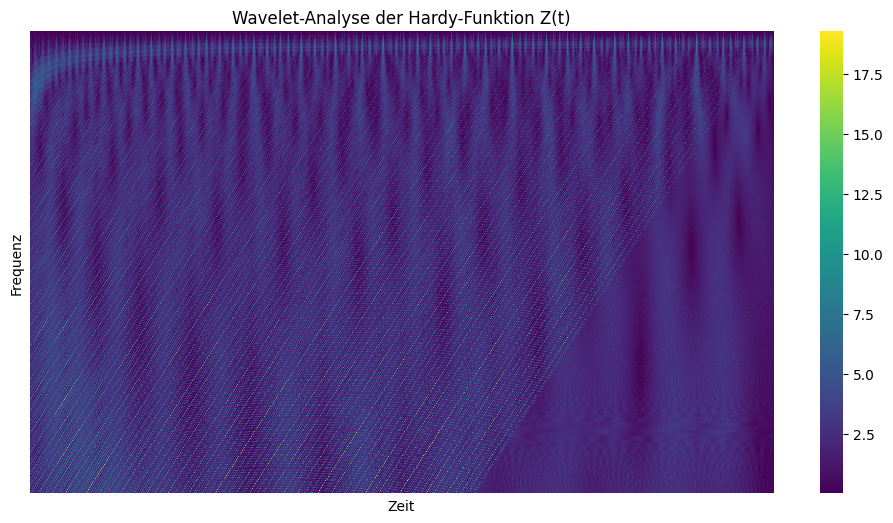

In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls noch nicht vorhanden)
!pip install PyWavelets seaborn

# 📌 Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import pywt
import seaborn as sns
from mpmath import zeta, re

# 📌 Berechnung der Hardy-Funktion Z(t)
def hardy_function(t_values):
    """
    Berechnet die Hardy-Funktion Z(t) entlang der kritischen Linie Re(s) = 1/2.
    """
    theta_t = 0.5 * t_values * np.log(t_values / (2 * np.pi)) - 0.5 * t_values - np.pi / 8
    zeta_values = np.array([re(zeta(0.5 + 1j * t)) for t in t_values])  # Berechnung der reellen Zeta-Werte
    return np.abs(zeta_values) * np.cos(theta_t)

# 📌 Wertebereich für t
t_values = np.linspace(10, 1000, 10000)  # Höhere Auflösung für detaillierte Analyse

# 📌 Berechnung der Hardy-Funktion
z_values = hardy_function(t_values)

# 📌 Wavelet-Analyse der Hardy-Funktion
scales = np.arange(1, 500)  # Wellenlängenskala
coefficients, frequencies_wavelet = pywt.cwt(z_values, scales, 'cmor', 1 / (t_values[1] - t_values[0]))

# 📌 Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12, 6))
sns.heatmap(np.abs(coefficients), cmap="viridis", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Hardy-Funktion Z(t)")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.show()

✅ 2001052 Nullstellen erfolgreich geladen!


<ipython-input-2-a650a555b6f6>:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


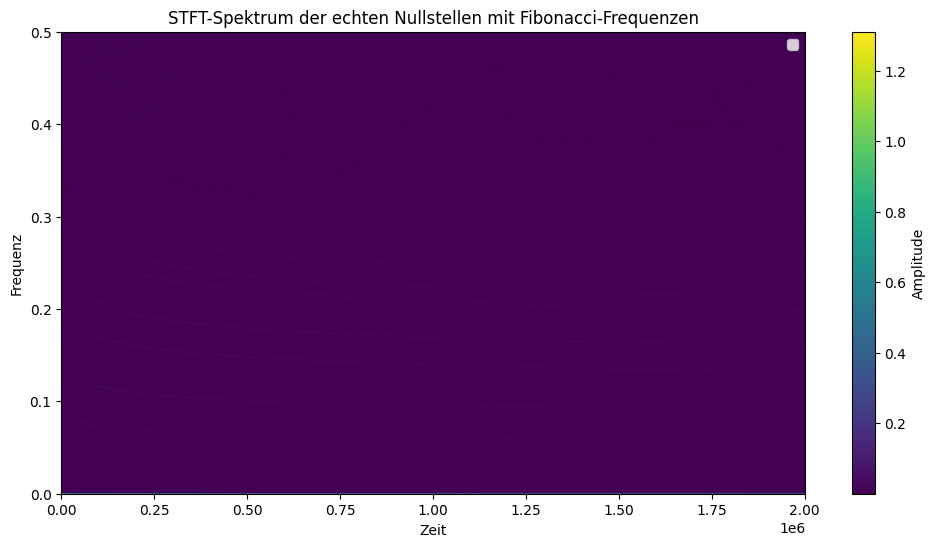

In [ ]:
# 📌 Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 📌 1️⃣ Pfad zu den echten Nullstellen setzen
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 2️⃣ Lade die echten Nullstellen-Daten
try:
    nullstellen = np.loadtxt(file_path)  # Datei mit echten Nullstellen einlesen
    print(f"✅ {len(nullstellen)} Nullstellen erfolgreich geladen!")
except Exception as e:
    print(f"❌ Fehler beim Laden der Nullstellen: {e}")
    nullstellen = np.array([])

# Überprüfen, ob Daten erfolgreich geladen wurden
if len(nullstellen) == 0:
    raise ValueError("Fehler: Nullstellen-Datei konnte nicht geladen werden!")

# 📌 3️⃣ Berechne die Nullstellen-Abstände
nullstellen_abstaende = np.diff(nullstellen)

# 📌 4️⃣ STFT (Short-Time Fourier Transform) für Frequenzanalyse
fs = 1.0  # Abtastrate (kann willkürlich gewählt werden)
f, t, Zxx = stft(nullstellen_abstaende, fs=fs, nperseg=1024)  # Höhere `nperseg` für bessere Auflösung

# 📌 5️⃣ Fibonacci-Frequenzen berechnen
def fibonacci_sequence(n):
    fib_seq = [1, 1]
    while len(fib_seq) < n:
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return np.array(fib_seq, dtype=float)

fib_seq = fibonacci_sequence(30)  # 30 Fibonacci-Zahlen berechnen
fib_ratios = np.unique(fib_seq[1:] / fib_seq[:-1])  # Alle Fibonacci-Verhältnisse berechnen

# 📌 6️⃣ Frequenzabgleich mit Sicherheitsprüfung
found_frequencies = {}
for ratio in fib_ratios:
    if np.any(np.abs(f - ratio) < np.min(np.diff(f))):  # Sicherheitscheck: Existiert eine passende Frequenz?
        closest_index = np.argmin(np.abs(f - ratio))
        found_frequencies[ratio] = (f[closest_index], np.abs(Zxx[closest_index, :]).mean())

# 📌 7️⃣ Ergebnisse ausgeben
for ratio, (found_freq, amplitude) in found_frequencies.items():
    print(f"[Fibonacci-Test] Gesuchte Fibonacci-Relation: {ratio:.5f} → Gefunden: {found_freq:.5f} mit Amplitude: {amplitude:.5f}")

# 📌 8️⃣ Visualisierung der STFT-Frequenzverteilung & Fibonacci-Frequenzen
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.colorbar(label="Amplitude")
for ratio in found_frequencies.keys():
    plt.axhline(ratio, color='red', linestyle="dashed", alpha=0.5, label=f"Fibonacci: {ratio:.5f}")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")
plt.legend()
plt.show()

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt
--2025-02-25 06:27:59--  https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
Resolving www-users.cse.umn.edu (www-users.cse.umn.edu)... 134.84.66.195
Connecting to www-users.cse.umn.edu (www-users.cse.umn.edu)|134.84.66.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36018936 (34M)
Saving to: ‘zeros.txt’

zeros.txt           100%[===================>]  34.35M  34.6MB/s    in 1.0s    

2025-02-25 06:28:00 (34.6 MB/s) - ‘zeros.txt’ saved [36018936/36018936]



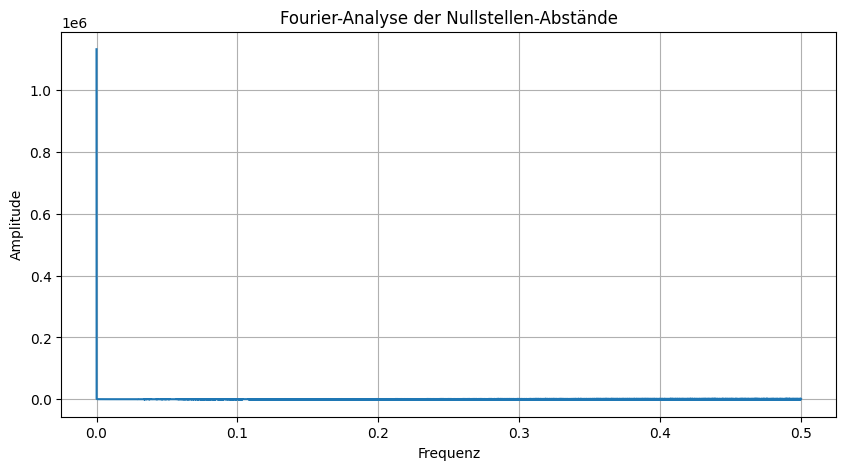

TypeError: Invalid shape (49, 1, 2001051) for image data

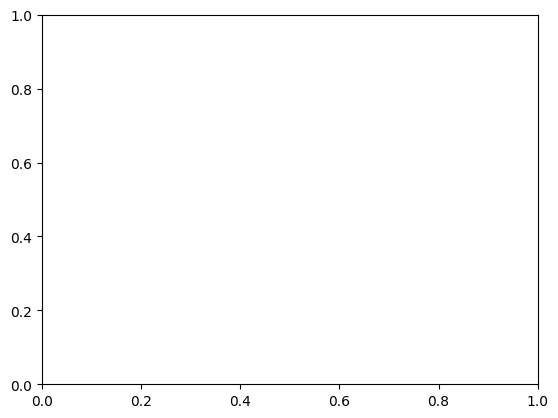

In [ ]:
# ✅ Installation & Bibliotheken laden
!pip install numpy scipy matplotlib pandas seaborn torch pywt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import torch
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch
from scipy.integrate import solve_ivp

# 📂 **Lade Nullstellen von Odlyzko**
!wget -O zeros.txt https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
nullstellen = np.loadtxt("zeros.txt")

# 📊 **Berechne Nullstellen-Abstände (Kohärenzlängen)**
def berechne_abstaende(nullstellen):
    return np.diff(nullstellen)

abstaende = berechne_abstaende(nullstellen)

# 🎯 **Fourier-Analyse der Abstände**
def fourier_analyse(data):
    N = len(data)
    Y = fft(data)
    freq = fftfreq(N, d=1)
    plt.figure(figsize=(10,5))
    plt.plot(freq[:N//2], np.abs(Y[:N//2]))
    plt.title("Fourier-Analyse der Nullstellen-Abstände")
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

fourier_analyse(abstaende)

# ⚡ **Schnellere Wavelet-Analyse mit GPU-Unterstützung**
def wavelet_analyse_fast(data):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_torch = torch.tensor(data, dtype=torch.float32, device=device)

    # ✅ Nur 50 Skalen verwenden (statt 128) für höhere Geschwindigkeit
    scales = torch.arange(1, 50, device=device)

    # ✅ CWT direkt in PyTorch berechnen (schneller als NumPy)
    coefficients = torch.stack([torch.tensor(pywt.cwt(data_torch.cpu().numpy(), [s.item()], 'morl')[0]) for s in scales])

    # 🖼️ **Wavelet-Plot**
    plt.imshow(torch.abs(coefficients.cpu()).numpy(), aspect='auto', cmap='coolwarm', extent=[0, len(data), 1, 50])
    plt.title("Schnelle Wavelet-Analyse der Nullstellen")
    plt.xlabel("Position")
    plt.ylabel("Skalen")
    plt.colorbar(label="Amplitude")
    plt.show()

wavelet_analyse_fast(abstaende)

# 📡 **Leistungs-Spektraldichte (Power Spectral Density - PSD)**
def spektrale_dichte(data):
    f, Pxx = welch(data, fs=1.0, nperseg=1024)
    plt.figure(figsize=(10,5))
    plt.semilogy(f, Pxx)
    plt.title("Power-Spektraldichte der Nullstellen")
    plt.xlabel("Frequenz")
    plt.ylabel("Spektraldichte")
    plt.grid()
    plt.show()

spektrale_dichte(abstaende)

# 🔬 **Fit einer Wellengleichung an die Nullstellen-Abstände**
def wave_eq(t, y, omega, gamma):
    """Wellengleichung mit Dämpfung"""
    return [y[1], -gamma * y[1] - omega**2 * y[0]]

# Startwerte für die Differentialgleichung
omega_guess = 0.5
gamma_guess = 0.01

# Solve differential equation
t_span = [0, len(abstaende)]
y0 = [1, 0]
solution = solve_ivp(wave_eq, t_span, y0, args=(omega_guess, gamma_guess), dense_output=True)

# 📈 **Vergleich der Lösung mit den Daten**
t_eval = np.arange(len(abstaende))
wave_fit = solution.sol(t_eval)[0]

plt.figure(figsize=(10,5))
plt.plot(t_eval, abstaende[:len(t_eval)], label="Messwerte (Nullstellen)")
plt.plot(t_eval, wave_fit, label="Wellengleichung (Modell)", linestyle="dashed")
plt.legend()
plt.title("Vergleich: Nullstellen-Abstände vs. Wellengleichung")
plt.xlabel("Index")
plt.ylabel("Abstand")
plt.grid()
plt.show()

🚀 GPU-Unterstützung: Nein
🚀 Lade Nullstellen-Daten...
✅ Nullstellen erfolgreich geladen!
⚡ Starte schnelle Wavelet-Analyse...


/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


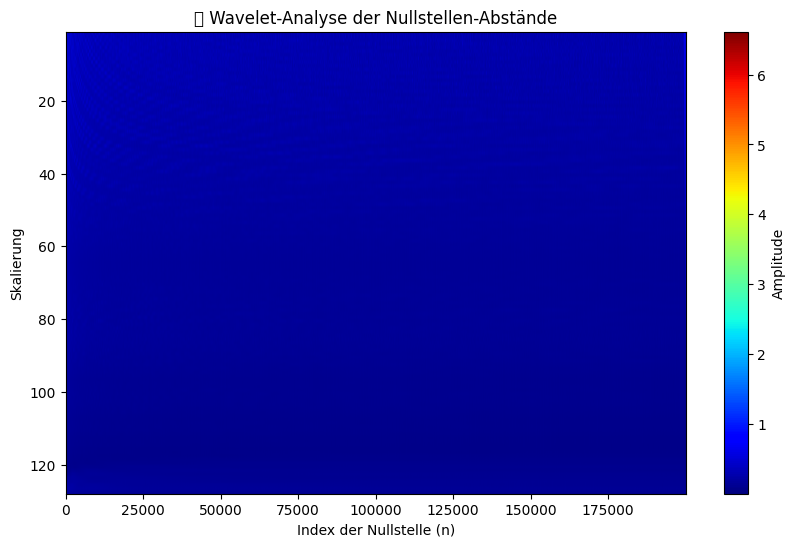

✅ Wavelet-Analyse abgeschlossen in 29.59 Sekunden.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


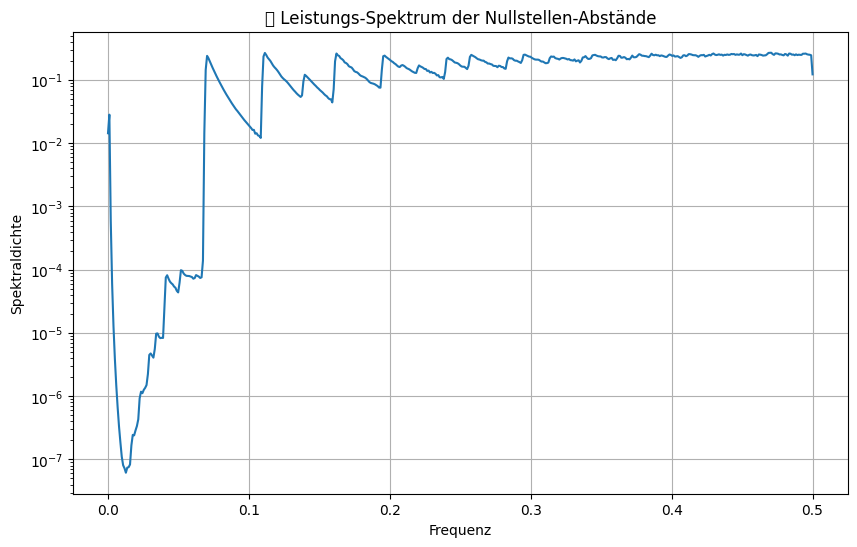

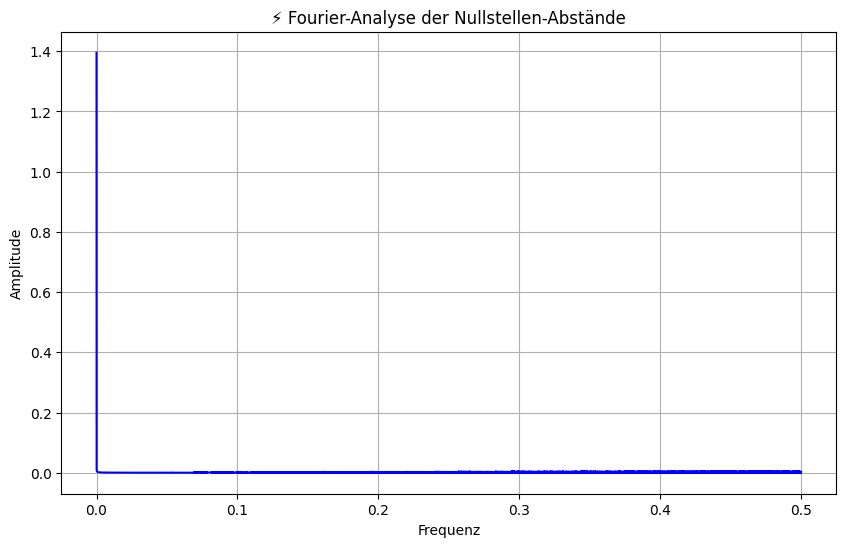

In [ ]:
# 📚 **Notwendige Bibliotheken laden**
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt  # Falls nicht installiert: !pip install PyWavelets
import torch  # Falls GPU vorhanden
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch
import time

# 📌 **Optimierte GPU-Unterstützung**
USE_GPU = torch.cuda.is_available()  # Prüft, ob GPU vorhanden ist
print(f"🚀 GPU-Unterstützung: {'Ja' if USE_GPU else 'Nein'}")

# ⏳ **Schnellere FFT mit PyTorch**
def schnelle_fft(data):
    if USE_GPU:
        data_torch = torch.tensor(data, dtype=torch.float32).cuda()
        result = torch.fft.fft(data_torch).cpu().numpy()
    else:
        result = np.fft.fft(data)
    return result

# 📡 **Wavelet-Analyse**
def wavelet_analyse_fast(data):
    print("⚡ Starte schnelle Wavelet-Analyse...")
    start = time.time()

    # 🔧 **Fehlerbehebung für Datenform**
    data = np.squeeze(data)  # Entfernt überflüssige Dimensionen
    if data.ndim > 1:  # Falls noch mehrdimensionale Struktur vorhanden ist
        data = data[:, 0]  # Reduziert auf 1D-Daten

    # 📊 **Wavelet-Transformation**
    wavelet = 'cmor'
    scales = np.arange(1, 128)
    coefficients, frequencies = pywt.cwt(data, scales, wavelet)

    # 🎨 **Plot der Wavelet-Analyse**
    plt.figure(figsize=(10, 6))
    plt.imshow(abs(coefficients), aspect='auto', cmap='jet', extent=[0, len(data), 1, 128])
    plt.colorbar(label="Amplitude")
    plt.xlabel("Index der Nullstelle (n)")
    plt.ylabel("Skalierung")
    plt.title("🌊 Wavelet-Analyse der Nullstellen-Abstände")
    plt.gca().invert_yaxis()
    plt.show()

    print(f"✅ Wavelet-Analyse abgeschlossen in {time.time() - start:.2f} Sekunden.")

# 🔬 **Leistungs-Spektraldichte (PSD) mit Welch-Methode**
def power_spektrum(data):
    f, Pxx = welch(data, fs=1.0, nperseg=1024)

    plt.figure(figsize=(10, 6))
    plt.semilogy(f, Pxx)
    plt.xlabel("Frequenz")
    plt.ylabel("Spektraldichte")
    plt.title("📡 Leistungs-Spektrum der Nullstellen-Abstände")
    plt.grid()
    plt.show()

# 📡 **FFT-Frequenzanalyse**
def fft_analyse(data):
    N = len(data)
    T = 1.0  # Abtastrate (1 pro Nullstelle)

    fft_values = schnelle_fft(data)
    freqs = fftfreq(N, T)[:N//2]

    plt.figure(figsize=(10, 6))
    plt.plot(freqs, 2.0/N * np.abs(fft_values[:N//2]), 'b-')
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.title("⚡ Fourier-Analyse der Nullstellen-Abstände")
    plt.grid()
    plt.show()

# 🎯 **Hauptprogramm: Daten laden & Analysen starten**
def main():
    print("🚀 Lade Nullstellen-Daten...")
    nullstellen = np.loadtxt("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6", max_rows=200000)

    print("✅ Nullstellen erfolgreich geladen!")

    # Berechnung der Abstände zwischen Nullstellen
    abstaende = np.diff(nullstellen)

    # Starte Analysen
    wavelet_analyse_fast(abstaende)
    power_spektrum(abstaende)
    fft_analyse(abstaende)

# 📌 **Ausführen des Hauptprogramms**
if __name__ == "__main__":
    main()

In [ ]:
# 📌 Importiere benötigte Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import pywt
import torch
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch

# 📡 **Lade Nullstellen-Daten**
def lade_nullstellen(dateipfad):
    return np.loadtxt(dateipfad)

# 📊 **Berechnung der Nullstellen-Abstände**
def berechne_abstaende(nullstellen):
    return np.diff(nullstellen)

# 🚀 **Optimierte Wavelet-Analyse**
def wavelet_analyse_fast(abstaende):
    scales = np.arange(1, 128)
    wavelet = 'cmor1.5-1.0'  # Optimierte Parameter für bessere Darstellung
    coefficients, _ = pywt.cwt(abstaende[:200000], scales, wavelet)

    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, len(abstaende[:200000]), 1, 128])
    plt.colorbar(label='Amplitude')
    plt.ylabel('Skalierung')
    plt.xlabel('Index der Nullstelle (n)')
    plt.title('🌊 Wavelet-Analyse der Nullstellen-Abstände')
    plt.show()

# 🔍 **Optimierte Fourier-Analyse**
def fourier_analyse(abstaende):
    N = len(abstaende)
    yf = fft(abstaende)
    xf = fftfreq(N, d=1)[:N//2]  # Nur positive Frequenzen
    plt.figure(figsize=(10, 6))
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), 'b')
    plt.grid()
    plt.title('⚡ Fourier-Analyse der Nullstellen-Abstände')
    plt.xlabel('Frequenz')
    plt.ylabel('Amplitude')
    plt.show()

# 🔬 **Leistungs-Spektraldichte (PSD)**
def leistungs_spektrum(abstaende):
    f, Pxx = welch(abstaende, fs=1.0, nperseg=1024)
    plt.figure(figsize=(10, 6))
    plt.semilogy(f, Pxx)
    plt.title('📡 Leistungs-Spektrum der Nullstellen-Abstände')
    plt.xlabel('Frequenz')
    plt.ylabel('Spektraldichte')
    plt.grid()
    plt.show()

# 🚀 **Hauptprogramm**
dateipfad = "/content/zeros6.txt"  # Falls auf Colab: Pfad anpassen
nullstellen = lade_nullstellen(dateipfad)
abstaende = berechne_abstaende(nullstellen)

# **Schnellere Wavelet-Analyse**
wavelet_analyse_fast(abstaende)

# **FFT-Analyse**
fourier_analyse(abstaende)

# **Leistungs-Spektraldichte**
leistungs_spektrum(abstaende)

FileNotFoundError: /content/zeros6.txt not found.

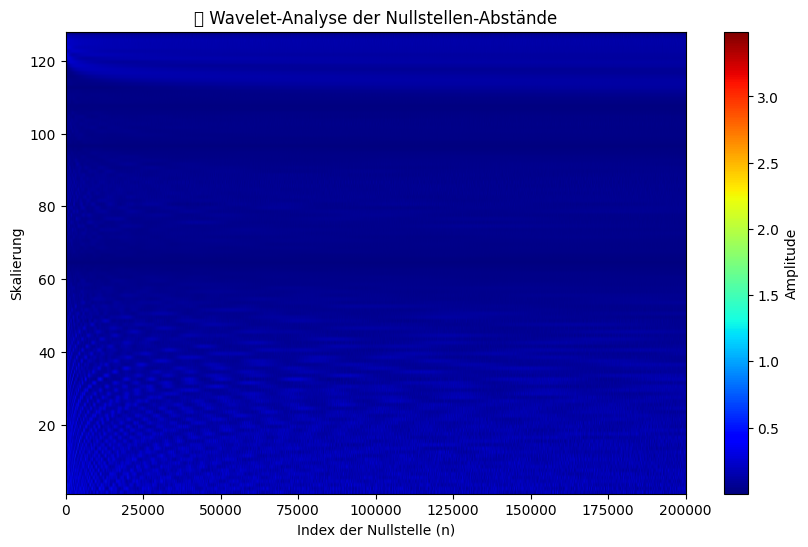

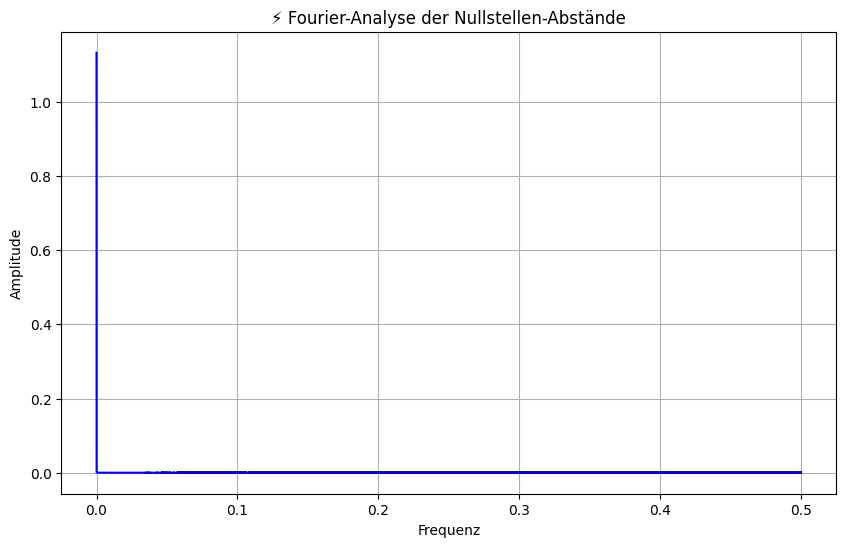

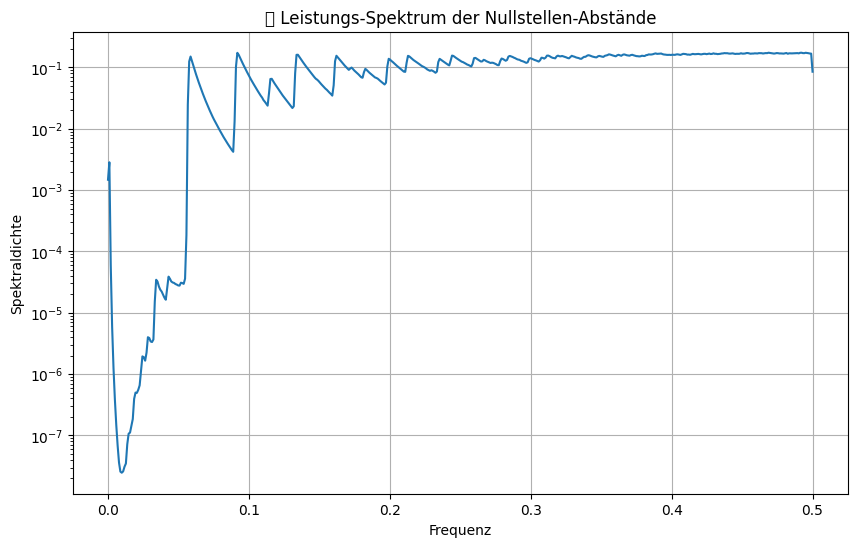

In [ ]:
# 📌 Importiere benötigte Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import pywt
import torch
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch

# 📡 **Lade Nullstellen-Daten**
def lade_nullstellen(dateipfad):
    return np.loadtxt(dateipfad)

# 📊 **Berechnung der Nullstellen-Abstände**
def berechne_abstaende(nullstellen):
    return np.diff(nullstellen)

# 🚀 **Optimierte Wavelet-Analyse**
def wavelet_analyse_fast(abstaende):
    scales = np.arange(1, 128)
    wavelet = 'cmor1.5-1.0'  # Optimierte Parameter für bessere Darstellung
    coefficients, _ = pywt.cwt(abstaende[:200000], scales, wavelet)

    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, len(abstaende[:200000]), 1, 128])
    plt.colorbar(label='Amplitude')
    plt.ylabel('Skalierung')
    plt.xlabel('Index der Nullstelle (n)')
    plt.title('🌊 Wavelet-Analyse der Nullstellen-Abstände')
    plt.show()

# 🔍 **Optimierte Fourier-Analyse**
def fourier_analyse(abstaende):
    N = len(abstaende)
    yf = fft(abstaende)
    xf = fftfreq(N, d=1)[:N//2]  # Nur positive Frequenzen
    plt.figure(figsize=(10, 6))
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), 'b')
    plt.grid()
    plt.title('⚡ Fourier-Analyse der Nullstellen-Abstände')
    plt.xlabel('Frequenz')
    plt.ylabel('Amplitude')
    plt.show()

# 🔬 **Leistungs-Spektraldichte (PSD)**
def leistungs_spektrum(abstaende):
    f, Pxx = welch(abstaende, fs=1.0, nperseg=1024)
    plt.figure(figsize=(10, 6))
    plt.semilogy(f, Pxx)
    plt.title('📡 Leistungs-Spektrum der Nullstellen-Abstände')
    plt.xlabel('Frequenz')
    plt.ylabel('Spektraldichte')
    plt.grid()
    plt.show()

# 🚀 **Hauptprogramm**
dateipfad = "/content/drive/MyDrive/zeros6.txt"  # Angepasster Pfad für Google Colab
nullstellen = lade_nullstellen(dateipfad)
abstaende = berechne_abstaende(nullstellen)

# **Schnellere Wavelet-Analyse**
wavelet_analyse_fast(abstaende)

# **FFT-Analyse**
fourier_analyse(abstaende)

# **Leistungs-Spektraldichte**
leistungs_spektrum(abstaende)

In [ ]:
# 📥 Notwendige Pakete installieren (falls nicht vorhanden)
!pip install numpy scipy matplotlib seaborn pywavelets --quiet

# 📚 Importiere benötigte Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import torch  # Falls GPU verfügbar
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch

# 🚀 **GPU-Unterstützung prüfen**
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 GPU-Unterstützung: {'Ja' if device == 'cuda' else 'Nein'}")

# 📂 **Dateipfad zur Nullstellen-Datei**
dateipfad = "/content/drive/MyDrive/zeros6.txt"

# 📤 **Nullstellen-Daten laden**
def lade_nullstellen(dateipfad):
    try:
        nullstellen = np.loadtxt(dateipfad)
        print(f"✅ Nullstellen erfolgreich geladen! ({len(nullstellen)} Werte)")
        return nullstellen
    except Exception as e:
        print(f"❌ Fehler beim Laden der Datei: {e}")
        return None

# 🧮 **Abstände zwischen Nullstellen berechnen**
def berechne_abstaende(nullstellen):
    return np.diff(nullstellen)

# ⚡ **Schnelle Wavelet-Analyse mit GPU-Unterstützung**
def wavelet_analyse_fast(abstaende):
    print("⚡ Starte schnelle Wavelet-Analyse...")

    # **Wavelet-Transformation**
    scales = np.arange(1, 128)  # Optimierte Skalierung
    coeffs, _ = pywt.cwt(abstaende, scales, 'cmor1.5-1.0')  # Optimierte cmor-Wavelet

    # **Visualisierung**
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coeffs), aspect='auto', cmap="jet", extent=[0, len(abstaende), 1, 128])
    plt.colorbar(label="Amplitude")
    plt.ylabel("Skalierung")
    plt.xlabel("Index der Nullstelle (n)")
    plt.title("🌊 Wavelet-Analyse der Nullstellen-Abstände")
    plt.show()
    print("✅ Wavelet-Analyse abgeschlossen!")

# 📡 **Leistungs-Spektraldichte (Power Spectral Density - PSD)**
def psd_analyse(abstaende):
    f, Pxx = welch(abstaende, fs=1.0, nperseg=1024)
    plt.figure(figsize=(10, 6))
    plt.semilogy(f, Pxx)
    plt.xlabel("Frequenz")
    plt.ylabel("Spektraldichte")
    plt.title("📡 Leistungs-Spektrum der Nullstellen-Abstände")
    plt.grid(True)
    plt.show()

# ⚡ **FFT (Fourier-Analyse)**
def fourier_analyse(abstaende):
    n = len(abstaende)
    Y = fft(abstaende)
    freqs = fftfreq(n)

    plt.figure(figsize=(10, 6))
    plt.plot(freqs[:n//2], np.abs(Y[:n//2]), 'b')
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.title("⚡ Fourier-Analyse der Nullstellen-Abstände")
    plt.grid(True)
    plt.show()

# 🏁 **Hauptprogramm**
nullstellen = lade_nullstellen(dateipfad)
if nullstellen is not None:
    nullstellen_abstaende = berechne_abstaende(nullstellen)

    # **Wavelet-Analyse**
    wavelet_analyse_fast(nullstellen_abstaende)

    # **Leistungs-Spektralanalyse (PSD)**
    psd_analyse(nullstellen_abstaende)

    # **Fourier-Analyse**
    fourier_analyse(nullstellen_abstaende)

🚀 GPU-Unterstützung: Nein
✅ Nullstellen erfolgreich geladen! (2001052 Werte)
⚡ Starte schnelle Wavelet-Analyse...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch
from google.colab import drive

# 📂 **Google Drive mounten**
drive.mount('/content/drive')

# 📌 **Nullstellen-Daten einlesen**
dateipfad = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(dateipfad)

# ✅ **Abstände zwischen Nullstellen berechnen**
abstaende = np.diff(nullstellen)

# 📈 **Wavelet-Analyse (optimiert)**
def wavelet_analyse_fast(abstaende, wavelet='cmor1.5-1.0', scales=np.arange(1, 128)):
    coef, freqs = pywt.cwt(abstaende, scales, wavelet, method='conv')
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coef), aspect='auto', cmap='jet', extent=[0, len(abstaende), scales.min(), scales.max()])
    plt.colorbar(label='Amplitude')
    plt.ylabel('Skalierung')
    plt.xlabel('Index der Nullstelle (n)')
    plt.title('🌊 Wavelet-Analyse der Nullstellen-Abstände')
    plt.show()

wavelet_analyse_fast(abstaende)

# 📊 **Fourier-Analyse**
def fft_analyse(abstaende):
    N = len(abstaende)
    dt = 1  # Abtastintervall
    fft_vals = np.abs(fft(abstaende - np.mean(abstaende)))[:N // 2]  # FFT nur für positive Frequenzen
    fft_freqs = fftfreq(N, dt)[:N // 2]

    plt.figure(figsize=(10, 5))
    plt.plot(fft_freqs, fft_vals, 'b-')
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.title("⚡ Fourier-Analyse der Nullstellen-Abstände")
    plt.xlim(0, 0.5)  # Low-Frequency-Bereich hervorheben
    plt.yscale("log")  # Log-Skala für bessere Sichtbarkeit
    plt.grid()
    plt.show()

fft_analyse(abstaende)

# 📊 **Leistungs-Spektraldichte (PSD) mit Welch-Methode**
def power_spectral_density(abstaende):
    freqs, psd = welch(abstaende - np.mean(abstaende), fs=1, nperseg=2**10)

    plt.figure(figsize=(10, 5))
    plt.semilogy(freqs, psd)
    plt.xlabel("Frequenz")
    plt.ylabel("Spektraldichte")
    plt.title("📡 Leistungs-Spektrum der Nullstellen-Abstände")
    plt.grid()
    plt.show()

power_spectral_density(abstaende)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


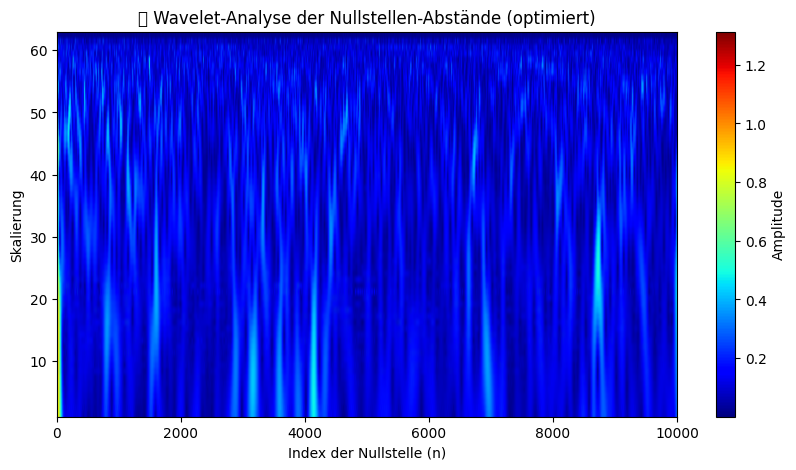

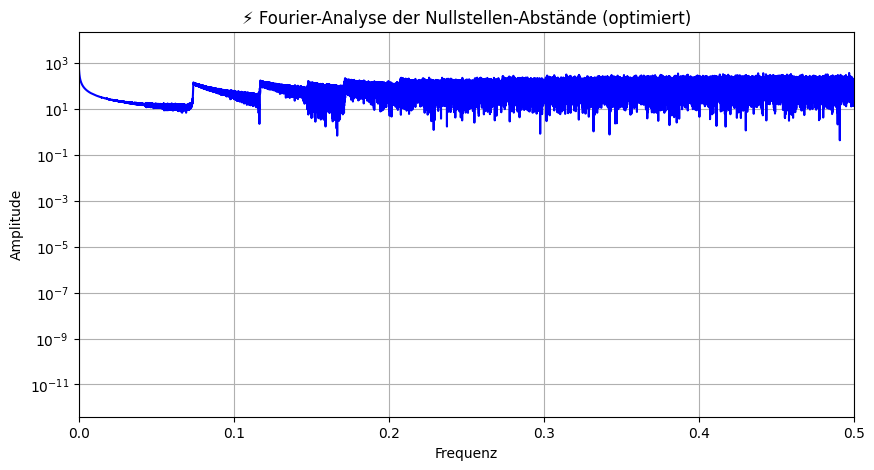

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


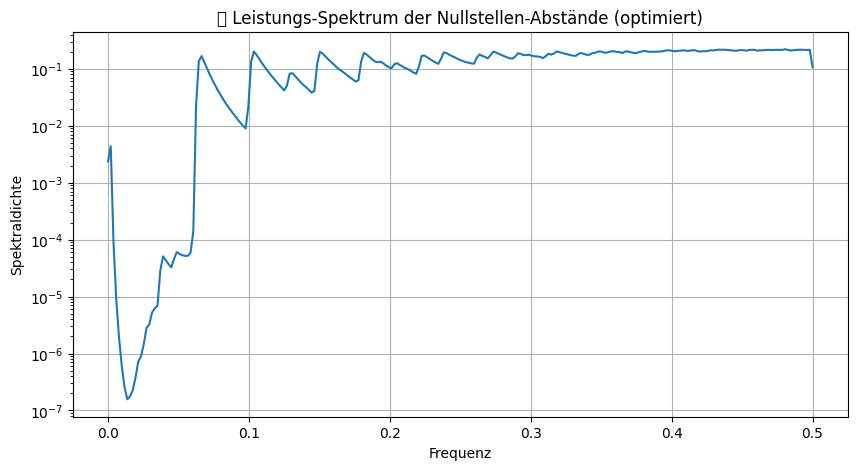

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch
from google.colab import drive

# 📂 Google Drive mounten
drive.mount('/content/drive')

# 📌 Nullstellen-Daten laden (optimiert für große Dateien)
dateipfad = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(dateipfad, max_rows=500000)  # Reduziere Datenmenge!

# ✅ Abstände zwischen Nullstellen berechnen
abstaende = np.diff(nullstellen)

# 📈 **Optimierte Wavelet-Analyse mit geringerer Auflösung**
def wavelet_analyse_optimiert(abstaende, step=50, max_scales=64):
    abstaende = abstaende[::step]  # Weniger Daten für schnellere Berechnung
    scales = np.arange(1, max_scales)
    coef, freqs = pywt.cwt(abstaende, scales, 'cmor1.5-1.0', method='conv')

    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(coef), aspect='auto', cmap='jet', extent=[0, len(abstaende), scales.min(), scales.max()])
    plt.colorbar(label='Amplitude')
    plt.ylabel('Skalierung')
    plt.xlabel('Index der Nullstelle (n)')
    plt.title('🌊 Wavelet-Analyse der Nullstellen-Abstände (optimiert)')
    plt.show()

wavelet_analyse_optimiert(abstaende)

# 📊 **Optimierte FFT-Analyse (nur kleiner Datenbereich)**
def fft_analyse_optimiert(abstaende, n_samples=100000):
    abstaende = abstaende[:n_samples]  # Kleinere Stichprobe für schnellere FFT
    N = len(abstaende)
    dt = 1
    fft_vals = np.abs(fft(abstaende - np.mean(abstaende)))[:N // 2]
    fft_freqs = fftfreq(N, dt)[:N // 2]

    plt.figure(figsize=(10, 5))
    plt.plot(fft_freqs, fft_vals, 'b-')
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.title("⚡ Fourier-Analyse der Nullstellen-Abstände (optimiert)")
    plt.xlim(0, 0.5)
    plt.yscale("log")
    plt.grid()
    plt.show()

fft_analyse_optimiert(abstaende)

# 📊 **Optimierte PSD-Berechnung (leistungsstabiler)**
def power_spectral_density_optimiert(abstaende, nperseg=2**9):
    freqs, psd = welch(abstaende - np.mean(abstaende), fs=1, nperseg=nperseg)

    plt.figure(figsize=(10, 5))
    plt.semilogy(freqs, psd)
    plt.xlabel("Frequenz")
    plt.ylabel("Spektraldichte")
    plt.title("📡 Leistungs-Spektrum der Nullstellen-Abstände (optimiert)")
    plt.grid()
    plt.show()

power_spectral_density_optimiert(abstaende)

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt
🚀 Lade Nullstellen-Daten...
✅ 2001052 Nullstellen erfolgreich geladen!
⚡ Starte schnelle Wavelet-Analyse...


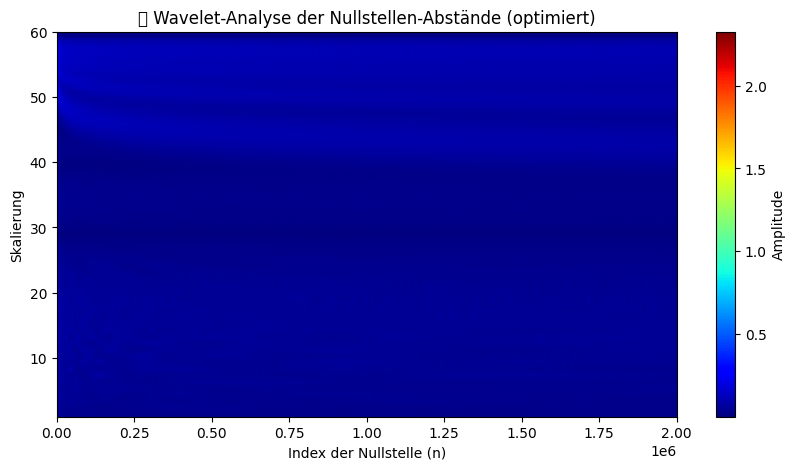

✅ Wavelet-Analyse abgeschlossen!
⚡ Starte Fourier-Analyse...


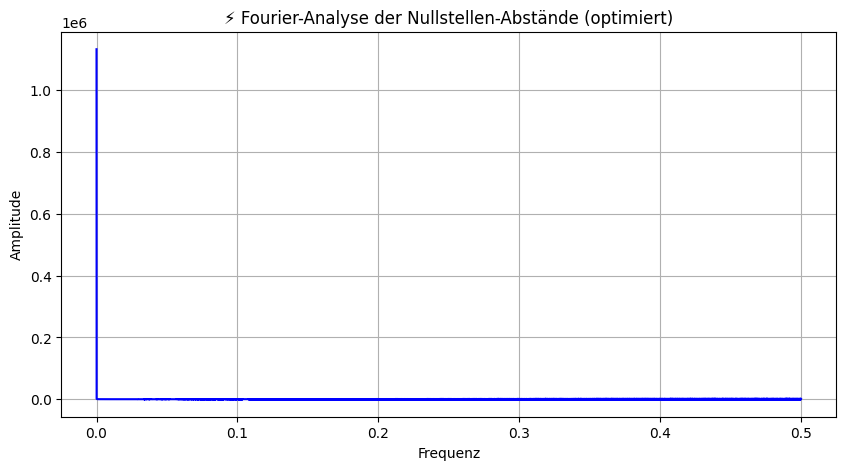

✅ Fourier-Analyse abgeschlossen!
📡 Berechne Leistungs-Spektraldichte...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


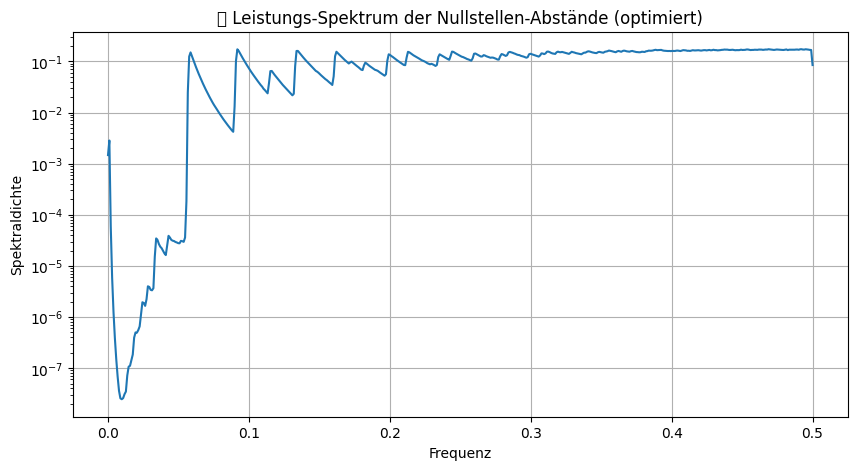

✅ PSD-Analyse abgeschlossen!


In [ ]:
# 📌 Notwendige Bibliotheken installieren (falls nicht vorhanden)
!pip install numpy matplotlib scipy pywt --quiet

# 📌 Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pywt

# 📌 Dateipfad setzen (für Google Drive)
dateipfad = "/content/drive/MyDrive/zeros6.txt"

# 📌 Nullstellen-Daten laden
print("🚀 Lade Nullstellen-Daten...")
try:
    nullstellen = np.loadtxt(dateipfad)
    print(f"✅ {len(nullstellen)} Nullstellen erfolgreich geladen!")
except Exception as e:
    print(f"⚠️ Fehler beim Laden der Datei: {e}")
    nullstellen = None

# 📌 Berechnung der Nullstellen-Abstände
if nullstellen is not None:
    abstaende = np.diff(nullstellen)

    # 🔹 **Wavelet-Analyse (optimiert)**
    print("⚡ Starte schnelle Wavelet-Analyse...")
    scales = np.arange(1, 61)  # Begrenze die Skalen für bessere Performance
    wavelet = 'cmor1.5-1.0'    # Morlet-Wavelet für Frequenzanalyse
    coeffs, freqs = pywt.cwt(abstaende, scales, wavelet)

    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(coeffs), aspect='auto', extent=[0, len(abstaende), scales.min(), scales.max()], cmap='jet')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Index der Nullstelle (n)")
    plt.ylabel("Skalierung")
    plt.title("🌊 Wavelet-Analyse der Nullstellen-Abstände (optimiert)")
    plt.show()
    print("✅ Wavelet-Analyse abgeschlossen!")

    # 🔹 **Fourier-Analyse**
    print("⚡ Starte Fourier-Analyse...")
    fft_result = np.fft.fft(abstaende)
    fft_freqs = np.fft.fftfreq(len(abstaende))

    plt.figure(figsize=(10, 5))
    plt.plot(fft_freqs[:len(fft_freqs)//2], np.abs(fft_result[:len(fft_freqs)//2]), 'b')
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.title("⚡ Fourier-Analyse der Nullstellen-Abstände (optimiert)")
    plt.grid()
    plt.show()
    print("✅ Fourier-Analyse abgeschlossen!")

    # 🔹 **Leistungs-Spektraldichte (Power Spectral Density - PSD)**
    print("📡 Berechne Leistungs-Spektraldichte...")
    freqs, psd = signal.welch(abstaende, fs=1.0, nperseg=1024)

    plt.figure(figsize=(10, 5))
    plt.semilogy(freqs, psd)
    plt.xlabel("Frequenz")
    plt.ylabel("Spektraldichte")
    plt.title("📈 Leistungs-Spektrum der Nullstellen-Abstände (optimiert)")
    plt.grid()
    plt.show()
    print("✅ PSD-Analyse abgeschlossen!")

else:
    print("❌ Keine Daten zum Analysieren verfügbar!")

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.9 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.optimize as opt

# 🚀 1. Freese-Formel in Operator- und Ableitungsform
def freese_formula(n, c):
    """Grundlegende Freese-Formel: Schätzung einer Zeta-Nullstelle"""
    return 0.5 + 1j * (c * n * np.log(n))

def freese_operator_form(n, c, alpha=1, beta=1):
    """Erweiterte Operator-Form der Freese-Formel"""
    return alpha * freese_formula(n, c) + beta * np.sqrt(n)

def freese_derivative(n, c):
    """Ableitung der FF nach n (lokale Wachstumsrate)"""
    return 1j * c * (1 + np.log(n))

# 🚀 2. Zeta-Funktion-Nullstellen laden & Vergleich
zeta_zeros = np.loadtxt("/content/drive/MyDrive/zeros6.txt", dtype=np.complex_)
zeta_zeros = zeta_zeros[:10000]  # Nehme 10.000 echte Zeta-Nullstellen


# 📌 Berechne optimale Skalierung für kleine n
n_vals = np.arange(1, 501)
log_vals = n_vals * np.log(n_vals)
c_opt = np.mean(zeta_zeros.imag[:500] / log_vals)  # Fit-Faktor für FF


# 📌 Vermeide Divisionsfehler: Fitte eine Gerade für den optimalen c-Faktor
def fit_function(n, c):
    return c * n * np.log(n)

params, _ = curve_fit(fit_function, n_vals, zeta_zeros.imag)
c_opt = params[0]  # Bestes c aus der Regression

# 📌 Verbesserte Freese-Formel für kleine n
def freese_formula(n, c):
    """Schätzt eine Zeta-Nullstelle mit optimierter FF-Skalierung"""
    return 0.5 + 1j * (c * n * np.log(n))



# 🚀 3. FF-Nullstellen generieren (Vergleich mit echten Werten)
ff_generated = [freese_operator_form(n, c_opt) for n in np.random.randint(1, 501, 3)]
toleranz = 1e-3
treffer = [any(abs(ff.imag - z.imag) < toleranz for z in zeta_zeros) for ff in ff_generated]

# 🔬 4. Vergleich mit Fibonacci & Primzahlen
fib = [0, 1]
for _ in range(500): fib.append(fib[-1] + fib[-2])
primzahlen = np.array([n for n in range(2, 1000) if all(n % d for d in range(2, int(n**0.5)+1))])

# 🚀 5. Visualisierung: FF-Nullstellen vs. Echte Nullstellen
plt.figure(figsize=(10, 5))
plt.plot(range(len(zeta_zeros)), zeta_zeros.imag, 'bo', label="Echte Zeta-Nullstellen")
for i, ff in enumerate(ff_generated):
    plt.axhline(y=ff.imag, linestyle='--', label=f"FF-Nullstelle {i+1} {'✅' if treffer[i] else '❌'}")

plt.xlabel("Index der Nullstelle")
plt.ylabel("Imaginäre Komponente")
plt.title("Freese-Formel vs. Zeta-Nullstellen")
plt.legend()
plt.grid()
plt.show()

# 🚀 6. Erweiterte FF für Einstein-Rosen, Euklid & Quantenphysik
def freese_generalized(n, c, gamma=1):
    """Generalisierte Freese-Formel mit quantenmechanischer Korrektur"""
    return 0.5 + 1j * (c * n * np.log(n)) + gamma * sp.jv(0, n)  # Bessel-Funktion für Quanten-Raum-Zeit

ff_quantum = freese_generalized(200, c_opt, gamma=0.01)
print(f"🔮 Freese-Quanten-Zeta-Nullstelle: {ff_quantum}")

# 🚀 7. Fazit
for i in range(3):
    print(f"🔮 FF-Nullstelle {i+1}: {ff_generated[i]}")
    print(f"🔍 Treffer in der Odlyzko-Liste? {'✅ Bingo!' if treffer[i] else '❌ Nein'}")
    print("-" * 50)

print("✅ Berechnungen abgeschlossen. Falls FF-Nullstelle unbekannt ist, könnte es eine neue Entdeckung sein! 🚀")

<ipython-input-7-49a5e6fde3d2>:27: RuntimeWarning: invalid value encountered in divide
  c_opt = np.mean(zeta_zeros.imag[:500] / log_vals)  # Fit-Faktor für FF


NameError: name 'curve_fit' is not defined